In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [6]:
usagers = pd.read_csv("usagers-2021.csv",delimiter=";")
vehicules = pd.read_csv("vehicules-2021.csv",delimiter=";")
lieux = pd.read_csv("lieux-2021.csv", delimiter=";")
caracteristiques = pd.read_csv("carcteristiques-2021.csv",delimiter=";")

# Regardons le contenu du/des data/-s imoprtée/-s

In [7]:
print(usagers.head())
print(vehicules.head())
print(lieux.head())
print(caracteristiques.head())

        Num_Acc id_vehicule num_veh  place  catu  grav  sexe  an_nais  trajet  \
0  202100000001     201 764     B01      1     1     3     1   2000.0       1   
1  202100000001     201 765     A01      1     1     1     1   1978.0       1   
2  202100000002     201 762     A01      1     1     4     1   1983.0       0   
3  202100000002     201 763     B01      1     1     3     1   1993.0       0   
4  202100000003     201 761     A01      1     1     1     1   1995.0       1   

   secu1  secu2  secu3  locp actp  etatp  
0      0      9     -1     0    0     -1  
1      1     -1     -1     0    0     -1  
2      1     -1     -1     0    0     -1  
3      1     -1     -1     0    0     -1  
4      1      0     -1     0    0     -1  
        Num_Acc id_vehicule num_veh  senc  catv  obs  obsm  choc  manv  motor  \
0  202100000001     201 764     B01     1     1    0     2     1     1      5   
1  202100000001     201 765     A01     1     7    0     9     3    17      1   
2  202100000

In [8]:
usagers

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202100000001,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,202100000001,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
2,202100000002,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1
3,202100000002,201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1
4,202100000003,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129148,202100056516,100 885,A01,1,1,4,1,1975.0,0,1,-1,-1,0,0,-1
129149,202100056516,100 886,B01,1,1,4,1,2002.0,5,1,-1,-1,0,0,-1
129150,202100056517,100 884,A01,1,1,3,1,1999.0,0,0,-1,-1,0,0,-1
129151,202100056518,100 882,A01,1,1,3,1,1968.0,3,1,0,-1,-1,-1,-1


In [9]:
vehicules

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202100000001,201 764,B01,1,1,0,2,1,1,5,NaN
1,202100000001,201 765,A01,1,7,0,9,3,17,1,NaN
2,202100000002,201 762,A01,0,7,2,2,1,1,0,NaN
3,202100000002,201 763,B01,0,7,0,2,1,9,0,NaN
4,202100000003,201 761,A01,1,7,0,1,3,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
97310,202100056516,100 885,A01,1,7,0,2,1,5,1,NaN
97311,202100056516,100 886,B01,2,7,0,2,3,1,1,NaN
97312,202100056517,100 884,A01,2,7,6,0,5,6,1,NaN
97313,202100056518,100 882,A01,2,7,0,2,1,6,1,NaN


In [10]:
lieux

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202100000001,3,981,-1,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,80
1,202100000002,3,20,0,E,2,2,0,1,0,10,1,NaN,-1,1,0,1,80
2,202100000003,4,GENERAL GALLIENI (BOULEVARD DU),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
3,202100000004,3,GENERAL GALLIENI (BOULEVARD DU),0,NaN,2,4,0,1,0,1,1,NaN,-1,1,0,1,50
4,202100000005,7,PARIS. ROUTE DE,-1,NaN,2,2,-1,1,11,150,1,NaN,-1,1,0,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,65,-1,NaN,3,4,0,2,0,454,3,NaN,-1,2,9,2,130
56514,202100056515,3,520,0,D,2,2,0,1,46,2,1,NaN,-1,5,0,3,80
56515,202100056516,3,538,-1,NaN,2,2,0,2,49,24,2,NaN,-1,2,0,1,80
56516,202100056517,4,NaN,-1,NaN,2,2,0,1,(1),(1),2,NaN,-1,2,5,3,80


In [11]:
caracteristiques

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,30,11,2021,07:32,2,30,30319,1,1,1,1,CD 981,"44,0389580000","4,3480220000"
1,202100000002,25,9,2021,14:20,1,51,51544,1,3,1,3,Aire de repos croisement D20E9 après sortie D977,"49,2421290000","4,5545460000"
2,202100000003,15,7,2021,07:55,1,85,85048,2,1,7,6,15 rue François Nicolas,"46,9219500000","-0,9644600000"
3,202100000004,27,3,2021,19:45,5,93,93005,2,2,3,6,Route de Mitry,"48,9493634583","2,5196639908"
4,202100000005,25,2,2021,07:20,5,76,76429,2,1,1,2,PARIS. ROUTE DE,"49,4083800000","1,1458100000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,1,2021,06:10,3,33,33021,1,1,5,6,NaN,"44,5266190000","-0,1955440000"
56514,202100056515,1,1,2021,10:20,1,38,38405,1,1,2,6,D520,"45,3802910000","5,7049140000"
56515,202100056516,1,1,2021,18:00,3,26,26064,1,1,2,1,Route départementale 538,"44,9112100000","5,0196360000"
56516,202100056517,1,1,2021,10:55,1,33,33003,1,2,1,6,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363"


# Calculont l'age des usagers

In [12]:
#usagers['age'] = usagers['an'] - usagers['an_nais']
# Calcul de l'âge de chaque usager et la creation d'une nouvelle colonne "age" pour determiner 
#l'age des usagers au moment d'accident. 
usagers['age'] = 2021 - usagers['an_nais']


In [13]:
print(usagers.head())

        Num_Acc id_vehicule num_veh  place  catu  grav  sexe  an_nais  trajet  \
0  202100000001     201 764     B01      1     1     3     1   2000.0       1   
1  202100000001     201 765     A01      1     1     1     1   1978.0       1   
2  202100000002     201 762     A01      1     1     4     1   1983.0       0   
3  202100000002     201 763     B01      1     1     3     1   1993.0       0   
4  202100000003     201 761     A01      1     1     1     1   1995.0       1   

   secu1  secu2  secu3  locp actp  etatp   age  
0      0      9     -1     0    0     -1  21.0  
1      1     -1     -1     0    0     -1  43.0  
2      1     -1     -1     0    0     -1  38.0  
3      1     -1     -1     0    0     -1  28.0  
4      1      0     -1     0    0     -1  26.0  


# Une nouvelle colonne est créée et ajoutée à la data frame 'usagers'

In [14]:
usagers

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,age
0,202100000001,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1,21.0
1,202100000001,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1,43.0
2,202100000002,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1,38.0
3,202100000002,201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1,28.0
4,202100000003,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129148,202100056516,100 885,A01,1,1,4,1,1975.0,0,1,-1,-1,0,0,-1,46.0
129149,202100056516,100 886,B01,1,1,4,1,2002.0,5,1,-1,-1,0,0,-1,19.0
129150,202100056517,100 884,A01,1,1,3,1,1999.0,0,0,-1,-1,0,0,-1,22.0
129151,202100056518,100 882,A01,1,1,3,1,1968.0,3,1,0,-1,-1,-1,-1,53.0


# Voyons voir quel est l'age moyen des usager 

In [15]:
# Calcul de la moyenne âges des usagers

moyenne_age = usagers['age'].dropna().mean()
print("La moyenne des âges des usagers est :", moyenne_age)

La moyenne des âges des usagers est : 37.90457306917501


# Le calcul de la moyenne de l'âges est cohérent avec des valeurs réalistes. La moyenne d'âge des usagers est d'environ 38 ans.

In [16]:
usagers['age'].mean()

37.90457306917501

# On va calculer l'age moyenne pour chaque categorie des usagers : Conducteur=1, Passager=2, Pieton=3
# Pour cela on va créer une nouvelle variable "moyennes_age_par_catu"

In [17]:
moyennes_age_par_catu = usagers.groupby('catu')['age'].mean()
print(moyennes_age_par_catu)

catu
1    39.601673
2    29.018792
3    42.040743
Name: age, dtype: float64


# On vois donc maintenat, que la moyenne d'age pour les usagers est: les conducteurs 39,5 ans,les passagers 29 ans, les piétons 42 ans

In [18]:
age_stats_par_catu = usagers.groupby('catu')['age'].agg(['min', 'max', 'mean'])
print(age_stats_par_catu)

      min    max       mean
catu                       
1     0.0  102.0  39.601673
2     0.0  109.0  29.018792
3     0.0  101.0  42.040743


In [19]:
print(age_stats_par_catu.loc[3])

min       0.000000
max     101.000000
mean     42.040743
Name: 3, dtype: float64


In [20]:
age_stats_par_catu[age_stats_par_catu['max'] == 109]

,min,max,mean
catu,,,
2,0.0,109.0,29.018792


In [21]:
index_max_age = age_stats_par_catu['max'].idxmax()
print("Index de la ligne avec l'âge maximal pour catu 3 :", index_max_age)

Index de la ligne avec l'âge maximal pour catu 3 : 2


In [22]:
num_accident = usagers.loc[(usagers['catu'] == 3) & (usagers['age'] == 109), 'Num_Acc'].values[0]
print("Numéro de l'accident :", num_accident)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [23]:
# usagers['Num_Acc'].isna().sum()

# Voyons l'âge des piétons :

In [24]:
usagers[usagers['catu'] == 3]['age'].unique()

array([ 62.,  48.,  76.,  35.,  67.,   1.,  26.,  15.,  12.,   8.,  63.,
         0.,  54.,  56.,  14.,  74.,  69.,  70.,  24.,   9.,  17.,  21.,
        81.,  25.,  11.,  55.,   7.,  96.,  68.,  45.,  23.,  64.,  66.,
        44.,  31.,  92.,  72.,  41.,  53.,   6.,  79.,   5.,   3.,  89.,
        34.,  59.,  58.,  75.,  33.,  16.,  71.,  77.,  13.,  61., 101.,
        65.,  78.,  36.,  93.,  84.,  27.,  85.,  43.,   4.,  10.,  18.,
        95.,  88.,  19.,  39.,  50.,  51.,  83.,  47.,  73.,  60.,  22.,
        37.,  29.,  20.,  28.,  32.,  49.,   2.,  30.,  42.,  52.,  38.,
        87.,  82.,  57.,  40.,  46.,  86.,  80.,  91.,  90.,  94.,  98.,
        97.,  99.])

<AxesSubplot:xlabel='age'>

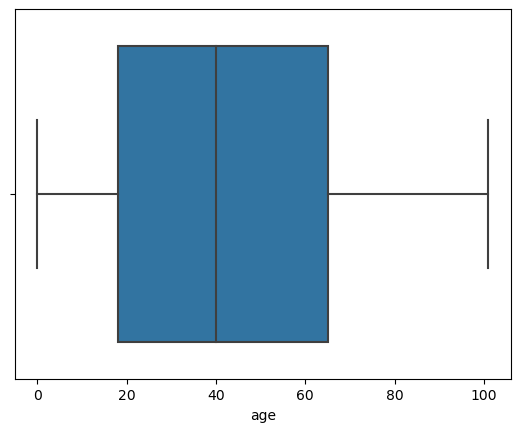

In [25]:

# créer une sous-table contenant les usagers dont la catégorie est catu = 3
usagers_catu3 = usagers.loc[usagers['catu'] == 3]

# créer le graphique de boîte à moustaches
sns.boxplot(x='age', data=usagers_catu3)


In [26]:
usagers_catu3 = usagers[usagers['catu'] == 3]

In [27]:
Q1 = usagers_catu3['age'].quantile(0.25)
Q3 = usagers_catu3['age'].quantile(0.75)
IQR = Q3 - Q1

In [28]:
Q1 = usagers_catu3['age'].quantile(0.25)
Q3 = usagers_catu3['age'].quantile(0.75)
IQR = Q3 - Q1

In [29]:
borne_inf = Q1 - 1.5*IQR
borne_sup = Q3 + 1.5*IQR

In [30]:
usagers_catu3_sans_aberrations = usagers_catu3[(usagers_catu3['age'] >= borne_inf) & (usagers_catu3['age'] <= borne_sup)]

In [31]:
# Elimination des valeurs aberrantes
Q1 = usagers.loc[usagers['catu']==3, 'age'].quantile(0.25)
Q3 = usagers.loc[usagers['catu']==3, 'age'].quantile(0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5*IQR
borne_sup = Q3 + 1.5*IQR
usagers_sans_aberrant = usagers[(usagers['catu'] == 3) & (usagers['age'] >= borne_inf) & (usagers['age'] <= borne_sup)]

# Affichage des statistiques
age_stats_sans_aberrant = usagers_sans_aberrant.groupby('catu')['age'].agg(['min', 'max', 'mean'])
print(age_stats_sans_aberrant)


      min    max       mean
catu                       
3     0.0  101.0  42.040743


In [32]:
usagers[usagers['catu'] == 3]['age'].unique()

array([ 62.,  48.,  76.,  35.,  67.,   1.,  26.,  15.,  12.,   8.,  63.,
         0.,  54.,  56.,  14.,  74.,  69.,  70.,  24.,   9.,  17.,  21.,
        81.,  25.,  11.,  55.,   7.,  96.,  68.,  45.,  23.,  64.,  66.,
        44.,  31.,  92.,  72.,  41.,  53.,   6.,  79.,   5.,   3.,  89.,
        34.,  59.,  58.,  75.,  33.,  16.,  71.,  77.,  13.,  61., 101.,
        65.,  78.,  36.,  93.,  84.,  27.,  85.,  43.,   4.,  10.,  18.,
        95.,  88.,  19.,  39.,  50.,  51.,  83.,  47.,  73.,  60.,  22.,
        37.,  29.,  20.,  28.,  32.,  49.,   2.,  30.,  42.,  52.,  38.,
        87.,  82.,  57.,  40.,  46.,  86.,  80.,  91.,  90.,  94.,  98.,
        97.,  99.])

In [33]:
usagers['sexe'].value_counts()

 1    86196
 2    39895
-1     3062
Name: sexe, dtype: int64

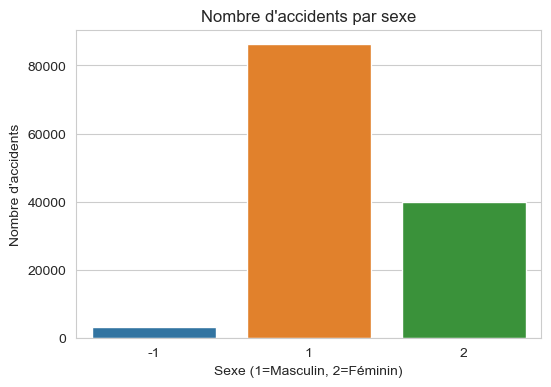

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x='sexe', data=usagers)
plt.title('Nombre d\'accidents par sexe')
plt.xlabel('Sexe (1=Masculin, 2=Féminin)')
plt.ylabel('Nombre d\'accidents')
plt.show()

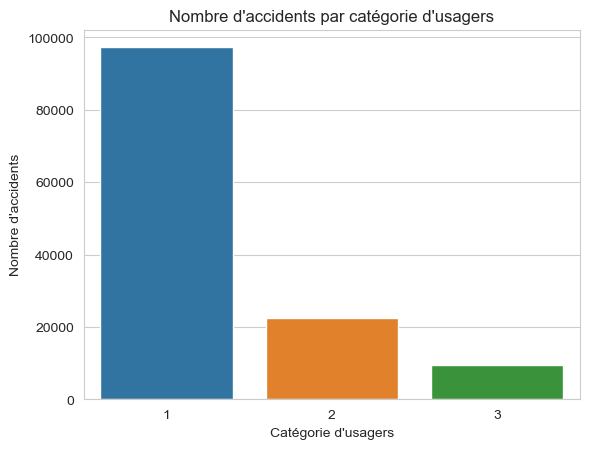

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='catu', data=usagers)
plt.title('Nombre d\'accidents par catégorie d\'usagers')
plt.xlabel('Catégorie d\'usagers')
plt.ylabel('Nombre d\'accidents')
plt.show()

In [36]:
vehicules['catv'].unique()

array([ 1,  7, 60, 32, 99, 37, 10,  2, 15, 14,  0, 33, 31, 34, 30, 50,  3,
       39, 36, 13, 80, 43, 38, 20, 40, 17, 35, 21, 16, 41, -1, 42],
      dtype=int64)

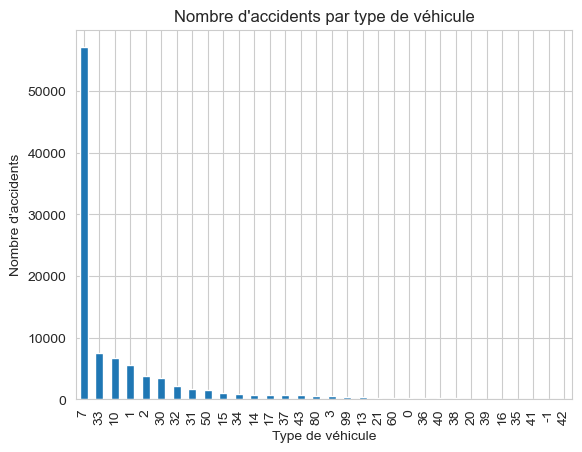

In [37]:
import matplotlib.pyplot as plt
vehicules['catv'].value_counts().plot(kind='bar')
plt.title('Nombre d\'accidents par type de véhicule')
plt.xlabel('Type de véhicule')
plt.ylabel('Nombre d\'accidents')
plt.show()

In [38]:
# On calcule le nombre d'accidents par commune
accidents_par_commune = caracteristiques['com'].value_counts()

In [39]:
print (accidents_par_commune)

75116    507
75112    434
75119    384
97302    377
75115    368
        ... 
68176      1
49183      1
49224      1
49235      1
33021      1
Name: com, Length: 11150, dtype: int64


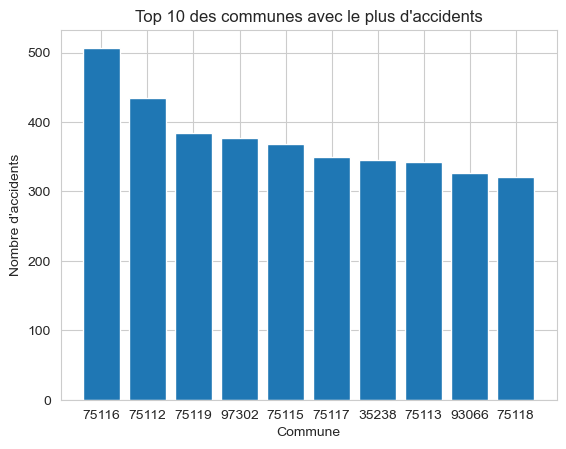

In [40]:
# On ne garde que les 10 communes avec le plus d'accidents
top_10_communes = accidents_par_commune[:10]
# On affiche le résultat sous forme de graphique à barres
plt.bar(top_10_communes.index, top_10_communes.values)
plt.title("Top 10 des communes avec le plus d'accidents")
plt.xlabel("Commune")
plt.ylabel("Nombre d'accidents")
plt.show()

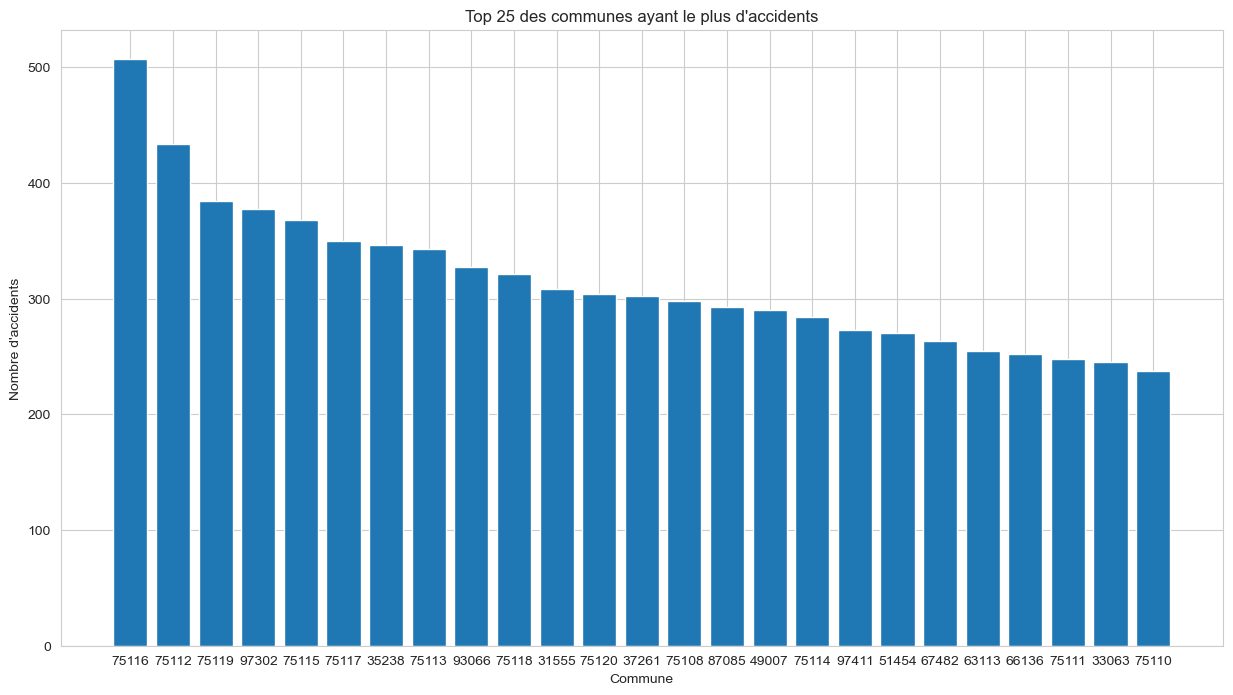

In [41]:
# sélection des 20 premières communes
top_20_communes = accidents_par_commune.head(25)
# création du graphique
plt.figure(figsize=(15,8))
plt.bar(top_20_communes.index, top_20_communes.values)
# plt.xticks(rotation=90)
plt.xlabel('Commune')
plt.ylabel('Nombre d\'accidents')
plt.title('Top 25 des communes ayant le plus d\'accidents')
plt.show()

In [42]:
caracteristiques['int'].unique()

array([1, 3, 2, 9, 6, 4, 7, 8, 5], dtype=int64)

# Nous pouvons voir dans quel type d'intersection les accidents se reproduisent le plus souvent

int - parametre indicant dans quel intersection l'accident se produit

Intersection :

1 – Hors intersection
2 – Intersection en X
3 – Intersection en T
4 – Intersection en Y
5 – Intersection à plus de 4 branches
6 – Giratoire
7 – Place
8 – Passage à niveau

<AxesSubplot:xlabel='int', ylabel='count'>

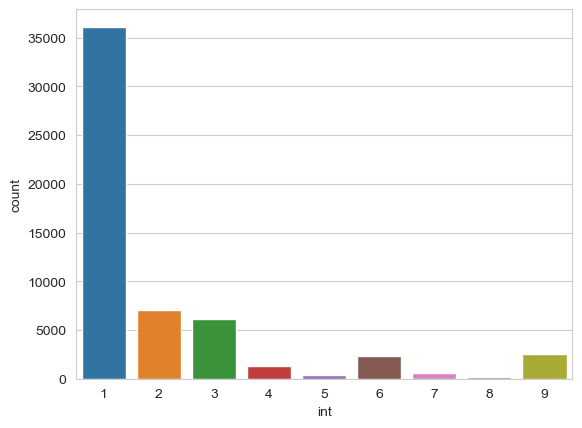

In [43]:
sns.countplot(x='int', data=caracteristiques)

# Quels sont des conditions atmosphériques pendant l'accident

In [44]:
caracteristiques['atm'].unique()

array([ 1,  7,  3,  2,  8,  9,  5,  4, -1,  6], dtype=int64)

<AxesSubplot:xlabel='atm', ylabel='count'>

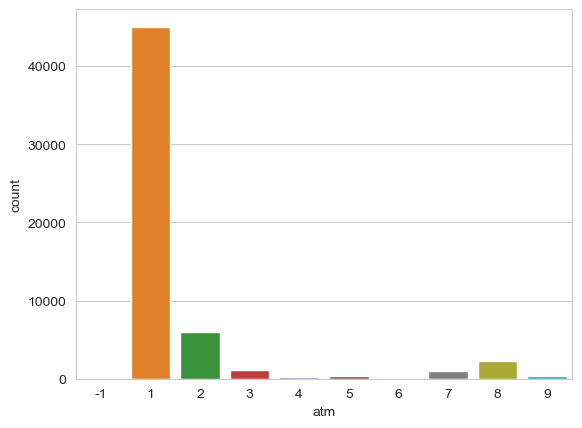

In [45]:
sns.countplot(x='atm', data=caracteristiques)

# Quantité des véhicules impliqués dans l'accident et type de collision  :
col
Type de collision :
-1 – Non renseigné
1 – Deux véhicules - frontale
2 – Deux véhicules – par l’arrière
3 – Deux véhicules – par le coté
4 – Trois véhicules et plus – en chaîne
5 – Trois véhicules et plus - collisions multiples
6 – Autre collision
7 – Sans collision

<AxesSubplot:xlabel='col', ylabel='count'>

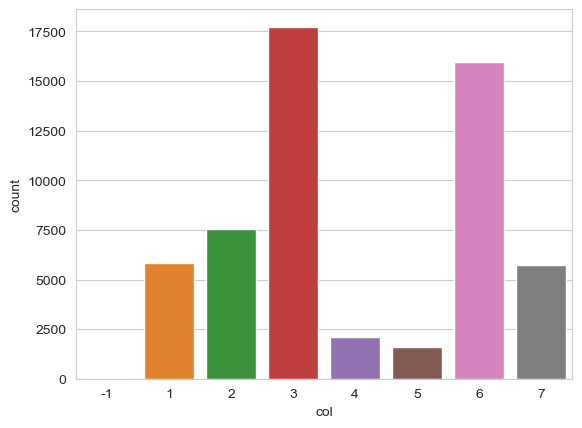

In [46]:
sns.countplot(x='col', data=caracteristiques)

# Conditions d’éclairage dans lesquelles l'accident s'est produit :

<AxesSubplot:xlabel='lum', ylabel='count'>

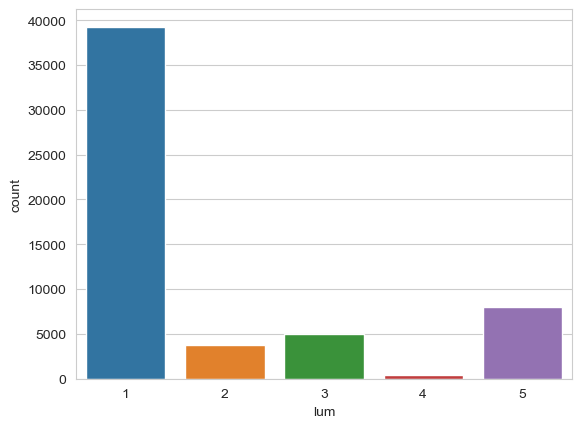

In [47]:
sns.countplot(x='lum', data=caracteristiques)

<AxesSubplot:xlabel='surf', ylabel='count'>

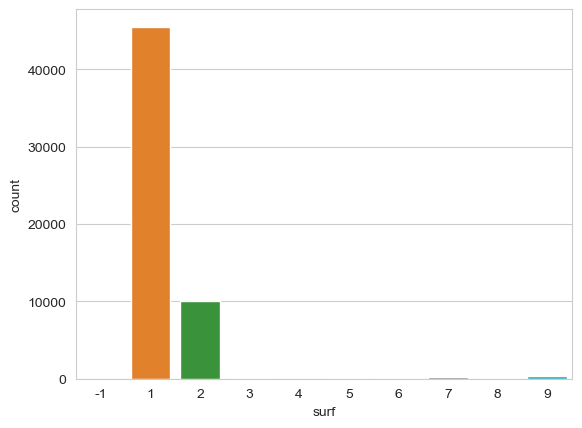

In [48]:
sns.countplot(x='surf', data=lieux)

<AxesSubplot:xlabel='infra', ylabel='count'>

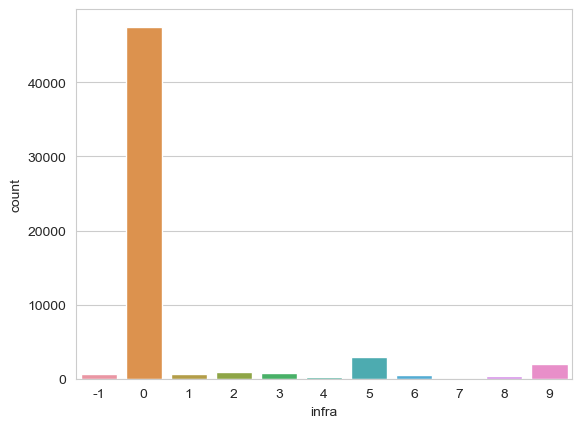

In [49]:
sns.countplot(x='infra', data=lieux) #pas preendre en compte le 0

In [51]:
df_accident = pd.concat([usagers,vehicules,lieux,caracteristiques ])
ignore_index=True
print(df_accident)

            Num_Acc id_vehicule num_veh  place  catu  grav  sexe  an_nais  \
0      202100000001     201 764     B01    1.0   1.0   3.0   1.0   2000.0   
1      202100000001     201 765     A01    1.0   1.0   1.0   1.0   1978.0   
2      202100000002     201 762     A01    1.0   1.0   4.0   1.0   1983.0   
3      202100000002     201 763     B01    1.0   1.0   3.0   1.0   1993.0   
4      202100000003     201 761     A01    1.0   1.0   1.0   1.0   1995.0   
...             ...         ...     ...    ...   ...   ...   ...      ...   
56513  202100056514         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56514  202100056515         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56515  202100056516         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56516  202100056517         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56517  202100056518         NaN     NaN    NaN   NaN   NaN   NaN      NaN   

       trajet  secu1  ...  lum  dep    com  agg  int  atm  col  \
0        

In [52]:
df_accident

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,...,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,201 764,B01,1.0,1.0,3.0,1.0,2000.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202100000001,201 765,A01,1.0,1.0,1.0,1.0,1978.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202100000002,201 762,A01,1.0,1.0,4.0,1.0,1983.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202100000002,201 763,B01,1.0,1.0,3.0,1.0,1993.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202100000003,201 761,A01,1.0,1.0,1.0,1.0,1995.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,33,33021,1.0,1.0,5.0,6.0,NaN,"44,5266190000","-0,1955440000"
56514,202100056515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,38,38405,1.0,1.0,2.0,6.0,D520,"45,3802910000","5,7049140000"
56515,202100056516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,26,26064,1.0,1.0,2.0,1.0,Route départementale 538,"44,9112100000","5,0196360000"
56516,202100056517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,33,33003,1.0,2.0,1.0,6.0,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363"


<AxesSubplot:xlabel='mois', ylabel='count'>

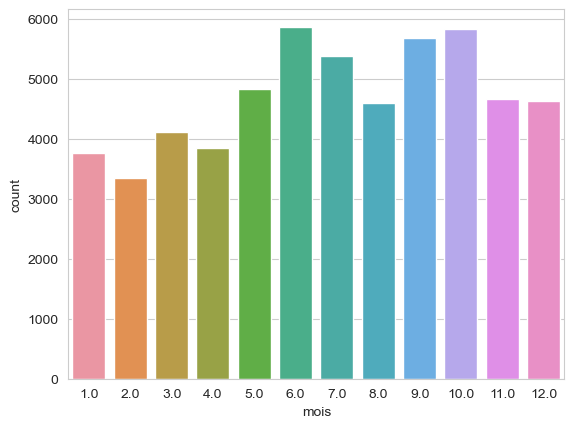

In [53]:
sns.countplot(x='mois', data=df_accident)

# Quel catégorie de route il y a des plus des accidents 

<AxesSubplot:xlabel='catr', ylabel='count'>

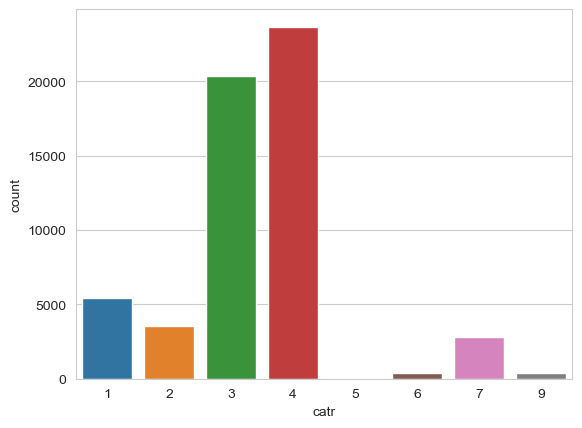

In [54]:
sns.countplot(x='catr', data=lieux)

# Quel Catégorie du véhicule est plus empliqué dans l'accidnet routiere

<AxesSubplot:xlabel='catv', ylabel='count'>

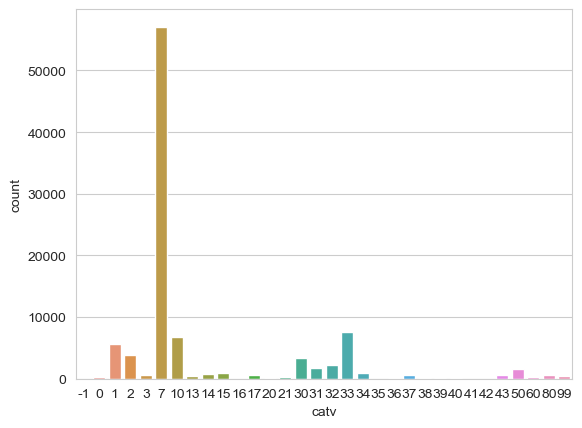

In [178]:
sns.countplot(x='catv', data=vehicules)

In [179]:
selected_catv = ['01', '07', '10', '05', '33']
vehicules_selected = vehicules.loc[vehicules['catv'].isin(selected_catv)]
selected_catv

['01', '07', '10', '05', '33']

In [180]:
#sns.countplot(x='catv', data=vehicules_selected)

ValueError: min() arg is an empty sequence

In [181]:
#sns.countplot(x='catv['1', '7', '10', '5', '33']', data=vehicules)

SyntaxError: invalid syntax (825889116.py, line 1)

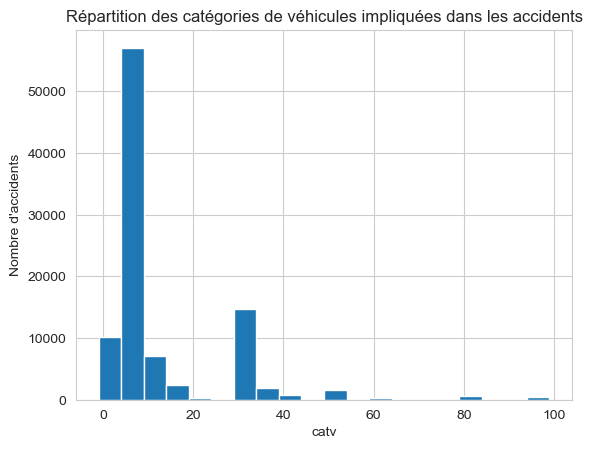

In [55]:
import matplotlib.pyplot as plt

vehicules['catv'].plot(kind='hist', bins=20)
plt.xlabel('catv')
plt.ylabel('Nombre d\'accidents')
plt.title('Répartition des catégories de véhicules impliquées dans les accidents')
plt.show()


In [183]:
vehicules['catv'].unique()

array([ 1,  7, 60, 32, 99, 37, 10,  2, 15, 14,  0, 33, 31, 34, 30, 50,  3,
       39, 36, 13, 80, 43, 38, 20, 40, 17, 35, 21, 16, 41, -1, 42],
      dtype=int64)

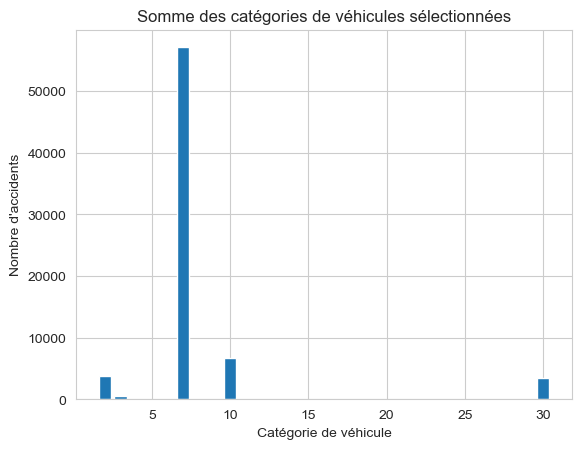

In [184]:
# Sélection des catégories de véhicules à visualiser
selected_catv = [4, 3, 7, 10, 30, 2]

# Filtrage des lignes pour ne garder que les catégories sélectionnées
filtered_vehicules = vehicules[vehicules['catv'].isin(selected_catv)]

# Calcul de la somme des catégories sélectionnées
sum_catv = filtered_vehicules.groupby('catv').size().reset_index(name='sum')

# Affichage du graphique
plt.bar(sum_catv['catv'], sum_catv['sum'])
plt.xlabel('Catégorie de véhicule')
plt.ylabel('Nombre d\'accidents')
plt.title('Somme des catégories de véhicules sélectionnées')
plt.show()


# On va va selectionner que certins types des véhicules, les plus utilisé dans la vie par les usagés et voir la quantité des accident 

In [185]:
vehicules.head(5)

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202100000001,201 764,B01,1,1,0,2,1,1,5,NaN
1,202100000001,201 765,A01,1,7,0,9,3,17,1,NaN
2,202100000002,201 762,A01,0,7,2,2,1,1,0,NaN
3,202100000002,201 763,B01,0,7,0,2,1,9,0,NaN
4,202100000003,201 761,A01,1,7,0,1,3,1,1,NaN


# Pour cela on va proceder à la création de nouvelle  DataFrame vehicules_selected dont contenant les valeurs/types sélectionnées de vehicules

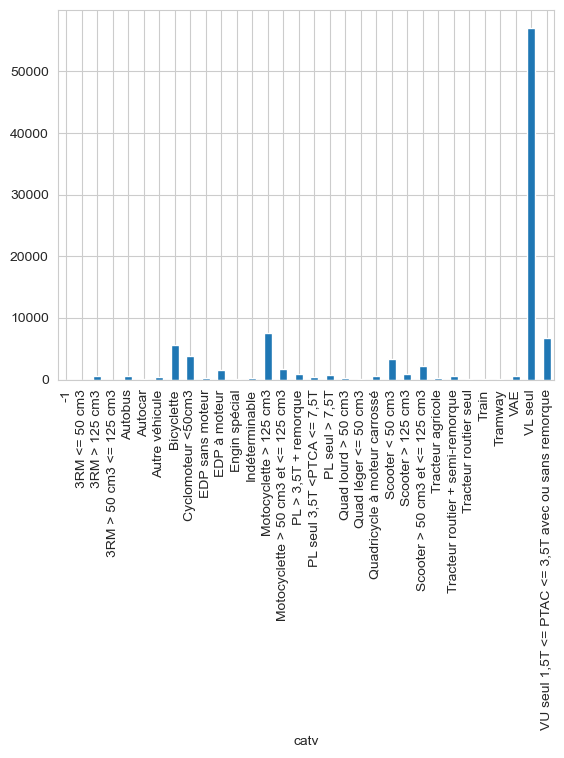

In [188]:
accidents_par_catv_4.plot(kind='bar')
plt.show()

In [187]:
accidents_par_catv_4

catv
-1                                                        4
3RM <= 50 cm3                                            11
3RM > 125 cm3                                           612
3RM > 50 cm3 <= 125 cm3                                   3
Autobus                                                 621
Autocar                                                 123
Autre véhicule                                          438
Bicyclette                                             5618
Cyclomoteur <50cm3                                     3822
EDP sans moteur                                         237
EDP à moteur                                           1510
Engin spécial                                            95
Indéterminable                                          219
Motocyclette > 125 cm3                                 7510
Motocyclette > 50 cm3 et <= 125 cm3                    1685
PL > 3,5T + remorque                                    970
PL seul 3,5T <PTCA <= 7,5T         

In [4]:
# création du DataFrame vehicules_selected contenant les valeurs sélectionnées de vehicules
#vehicules4 = vehicules2.query('catv in ["Bicyclette", "VL seul", "Scooter > 50 cm3 et <= 125 cm3", "Motocyclette > 125 cm3", "Scooter > 125 cm3", "Autobus", "Train"]')
accidents_par_catv_4 = vehicules2.groupby('catv')['Num_Acc'].count()
accidents_par_catv_4.plot(kind='bar')
plt.show()

NameError: name 'vehicules2' is not defined

# Affichons la DataFrame "vehicules_selected"

In [82]:
vehicules_selected

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202100000001,201 764,B01,1,1,0,2,1,1,5,NaN
1,202100000001,201 765,A01,1,7,0,9,3,17,1,NaN
2,202100000002,201 762,A01,0,7,2,2,1,1,0,NaN
3,202100000002,201 763,B01,0,7,0,2,1,9,0,NaN
4,202100000003,201 761,A01,1,7,0,1,3,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
97310,202100056516,100 885,A01,1,7,0,2,1,5,1,NaN
97311,202100056516,100 886,B01,2,7,0,2,3,1,1,NaN
97312,202100056517,100 884,A01,2,7,6,0,5,6,1,NaN
97313,202100056518,100 882,A01,2,7,0,2,1,6,1,NaN


<AxesSubplot:xlabel='catv', ylabel='count'>

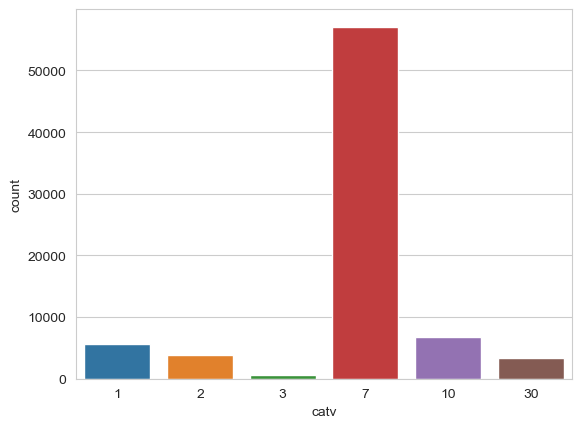

In [83]:
sns.countplot(x='catv', data=vehicules_selected)

# Allons voir le nombre d'accidents pour les catégories de véhicules telles que :01 – Bicyclette; 07 – VL seul; 30 – Scooter < 50 cm3; 33 – Motocyclette > 125 cm3; 32 – Scooter > 50 cm3 et <= 125 cm3; 37 – Autobus; 39 – Train 

In [ ]:
#vehicules_selected_2 = vehicules_selected = vehicules.loc[vehicules['catv'].isin([1, 7, 3, 10, 30, 2])]

In [86]:
vehicules.head(2)

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202100000001,201 764,B01,1,1,0,2,1,1,5,NaN
1,202100000001,201 765,A01,1,7,0,9,3,17,1,NaN


In [89]:
print(vehicules.dtypes)

Num_Acc          int64
id_vehicule     object
num_veh         object
senc             int64
catv             int64
obs              int64
obsm             int64
choc             int64
manv             int64
motor            int64
occutc         float64
dtype: object


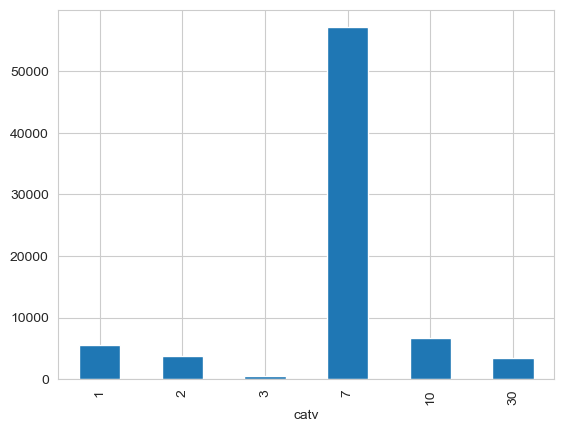

In [100]:
import matplotlib.pyplot as plt

# Filtrer le DataFrame pour sélectionner les catégories de véhicules souhaitées
vehicules_selected_3 = vehicules.query('catv in [1, 30, 7, 33, 32, 37, 39]')

# Calculer la somme des accidents pour chaque catégorie de véhicules
accidents_par_catv_3 = vehicules_selected.groupby('catv')['Num_Acc'].count()

# Tracer un graphique à barres de la somme des accidents pour chaque catégorie de véhicules
accidents_par_catv_3.plot(kind='bar')
plt.show()


In [90]:
vehicules2 = pd.read_csv("vehicules-2021.csv",delimiter=";")
vehicules2

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202100000001,201 764,B01,1,1,0,2,1,1,5,NaN
1,202100000001,201 765,A01,1,7,0,9,3,17,1,NaN
2,202100000002,201 762,A01,0,7,2,2,1,1,0,NaN
3,202100000002,201 763,B01,0,7,0,2,1,9,0,NaN
4,202100000003,201 761,A01,1,7,0,1,3,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
97310,202100056516,100 885,A01,1,7,0,2,1,5,1,NaN
97311,202100056516,100 886,B01,2,7,0,2,3,1,1,NaN
97312,202100056517,100 884,A01,2,7,6,0,5,6,1,NaN
97313,202100056518,100 882,A01,2,7,0,2,1,6,1,NaN


In [95]:
vehicules2['catv'] = vehicules2['catv'].replace({0:'Indéterminable', 
1:'Bicyclette',
2:'Cyclomoteur<50cm3',
3:'Quadricycle à moteur carrossé', 
4:'scooter immatriculé',
5:'motocyclette', 
6:'side-car', 
7:'VL seul', 
8 :'VL + caravane',
9:'VL + remorque',
10:'VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque',
11:'VU (10) + caravane',
12:'VU (10) + remorque',
13:'PL seul 3,5T <PTCA <= 7,5T',
14:'PL seul > 7,5T',
15:'PL > 3,5T + remorque',
16:'Tracteur routier seul',
17:'Tracteur routier + semi-remorque',
18:'Référence inutilisée depuis 2006 (transport en commun)',
19:'Référence inutilisée depuis 2006 (tramway)',
20:'Engin spécial',
21:'Tracteur agricole',
30:'Scooter < 50 cm3',
31:'Motocyclette > 50 cm3 et <= 125 cm3',
32:'Scooter > 50 cm3 et <= 125 cm3',
33:'Motocyclette > 125 cm3',
34:'Scooter > 125 cm3',
35:'Quad léger <= 50 cm3',
36:'Quad lourd > 50 cm3',
37:'Autobus',
38:'Autocar',
39:'Train',
40:'Tramway',
41:'3RM <= 50 cm3',
42:'3RM > 50 cm3 <= 125 cm3',
43:'3RM > 125 cm3',
50:'EDP à moteur',
60:'EDP sans moteur',
80:'VAE',
99:'Autre véhicule'})


In [204]:
vehicules2['catv'] = vehicules2['catv'].astype(str)

In [97]:
vehicules2['catv']

0        Bicyclette
1           VL seul
2           VL seul
3           VL seul
4           VL seul
            ...    
97310       VL seul
97311       VL seul
97312       VL seul
97313       VL seul
97314       VL seul
Name: catv, Length: 97315, dtype: object

In [98]:
vehicules2['catv'].unique()

array(['Bicyclette', 'VL seul', 'EDP sans moteur',
       'Scooter > 50 cm3 et <= 125 cm3', 'Autre véhicule', 'Autobus',
       'VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque',
       'Cyclomoteur <50cm3', 'PL > 3,5T + remorque', 'PL seul > 7,5T',
       'Indéterminable', 'Motocyclette > 125 cm3',
       'Motocyclette > 50 cm3 et <= 125 cm3', 'Scooter > 125 cm3',
       'Scooter < 50 cm3', 'EDP à moteur',
       'Quadricycle à moteur carrossé', 'Train', 'Quad lourd > 50 cm3',
       'PL seul 3,5T <PTCA <= 7,5T', 'VAE', '3RM > 125 cm3', 'Autocar',
       'Engin spécial', 'Tramway', 'Tracteur routier + semi-remorque',
       'Quad léger <= 50 cm3', 'Tracteur agricole',
       'Tracteur routier seul', '3RM <= 50 cm3', -1,
       '3RM > 50 cm3 <= 125 cm3'], dtype=object)

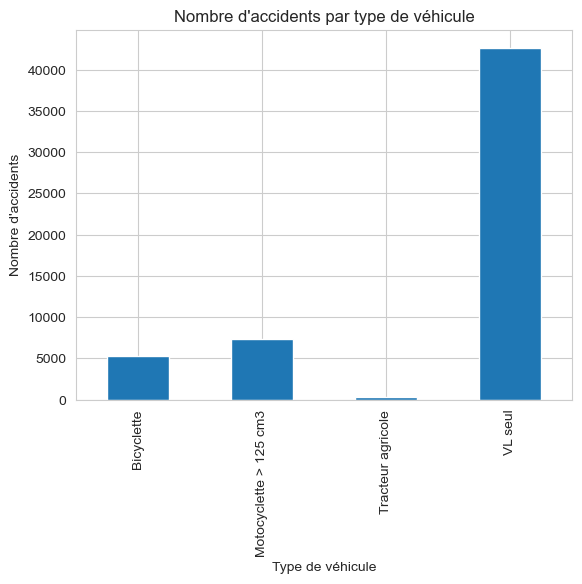

In [114]:

# Sélection des lignes correspondant aux véhicules voulus dans la colonne 'catv'
vehicules_sel = vehicules2.loc[vehicules2['catv'].isin(['Bicyclette', 'VL seul', 'Motocyclette > 125 cm3', 'Tracteur agricole'])]

# Calcul de la somme des accidents par type de véhicule
accidents_par_vehicule = vehicules_sel.groupby('catv')['Num_Acc'].nunique()

# Affichage du graphique
accidents_par_vehicule.plot(kind='bar', title='Nombre d\'accidents par type de véhicule')
plt.xlabel('Type de véhicule')
plt.ylabel('Nombre d\'accidents')
plt.show()


# Voyons voir les accidents de deux roues, pour cela on va selectioner que les deux roues motorisé :

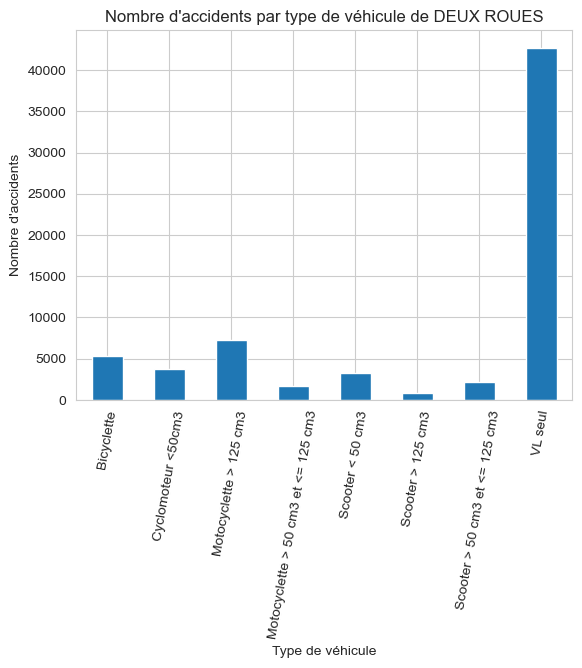

In [227]:
vehicules_sel = vehicules2.loc[vehicules2['catv'].isin(['Bicyclette', 'VL seul',
'Motocyclette > 125 cm3','Scooter > 50 cm3 et <= 125 cm3', 'Cyclomoteur <50cm3','Motocyclette > 50 cm3 et <= 125 cm3',
'Scooter > 125 cm3','Scooter < 50 cm3'])]
accidents_par_vehicule = vehicules_sel.groupby('catv')['Num_Acc'].nunique()
accidents_par_vehicule.plot(kind='bar', title='Nombre d\'accidents par type de véhicule de DEUX ROUES')
plt.xlabel('Type de véhicule')
plt.ylabel('Nombre d\'accidents')
plt.xticks(rotation= 80)
plt.show()

In [56]:
df_accident

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,...,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,201 764,B01,1.0,1.0,3.0,1.0,2000.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202100000001,201 765,A01,1.0,1.0,1.0,1.0,1978.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202100000002,201 762,A01,1.0,1.0,4.0,1.0,1983.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202100000002,201 763,B01,1.0,1.0,3.0,1.0,1993.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202100000003,201 761,A01,1.0,1.0,1.0,1.0,1995.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,33,33021,1.0,1.0,5.0,6.0,NaN,"44,5266190000","-0,1955440000"
56514,202100056515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,38,38405,1.0,1.0,2.0,6.0,D520,"45,3802910000","5,7049140000"
56515,202100056516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,26,26064,1.0,1.0,2.0,1.0,Route départementale 538,"44,9112100000","5,0196360000"
56516,202100056517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,33,33003,1.0,2.0,1.0,6.0,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363"


ValueError: Unknown format code 'd' for object of type 'float'

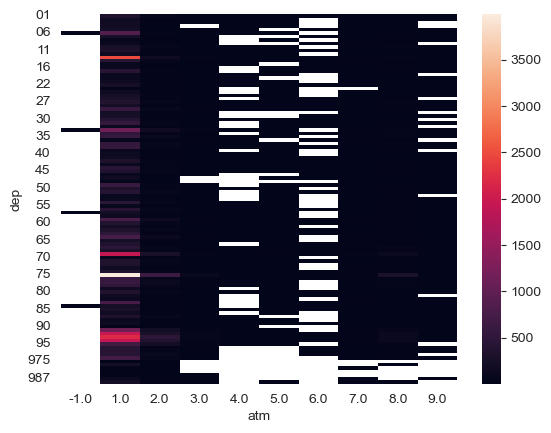

In [57]:

# Sélectionner les colonnes dont vous avez besoin (Num_Acc et atm pour les données d'environnement et dep pour le département)
df_heatmap = df_accident[['Num_Acc', 'atm', 'dep']]

# Remplacer les codes de département par les noms de département (facultatif)
#dep_names = {75:'Paris', 77:'Seine-et-Marne', 78:'Yvelines', 91:'Essonne', 92:'Hauts-de-Seine', 93:'Seine-Saint-Denis', 94:'Val-de-Marne', 95:'Val-d\'Oise'}
#df_heatmap['dep'] = df_heatmap['dep'].replace(dep_names)

# Compter le nombre d'accidents par département et par type d'environnement
df_heatmap = df_heatmap.groupby(['dep', 'atm'])['Num_Acc'].nunique().reset_index()

# Pivoter les données pour avoir les types d'environnement en colonnes et les départements en index
df_heatmap = df_heatmap.pivot(index='dep', columns='atm', values='Num_Acc')

# Créer la heatmap
sns.heatmap(df_heatmap, annot=True, fmt="d")


In [104]:
# y = df_accident.loc[:,['2']]
# X = df_accident.drop(['2'], axis=1).copy()

In [237]:
df_accident['grav']

0        3.0
1        1.0
2        4.0
3        3.0
4        1.0
        ... 
56513    NaN
56514    NaN
56515    NaN
56516    NaN
56517    NaN
Name: grav, Length: 339504, dtype: float64

In [59]:
df_accident['grav'] = df_accident['grav'].replace({
1:'Indemne',
2 :'Tué',
3 :'Blessé hospitalisé',
4 :'Blessé léger'})


In [60]:
df_accident['grav']

0        Blessé hospitalisé
1                   Indemne
2              Blessé léger
3        Blessé hospitalisé
4                   Indemne
                ...        
56513                   NaN
56514                   NaN
56515                   NaN
56516                   NaN
56517                   NaN
Name: grav, Length: 339504, dtype: object

In [61]:
df_accident['grav'].unique()

array(['Blessé hospitalisé', 'Indemne', 'Blessé léger', 'Tué', -1.0, nan],
      dtype=object)

<AxesSubplot:xlabel='atm', ylabel='dep'>

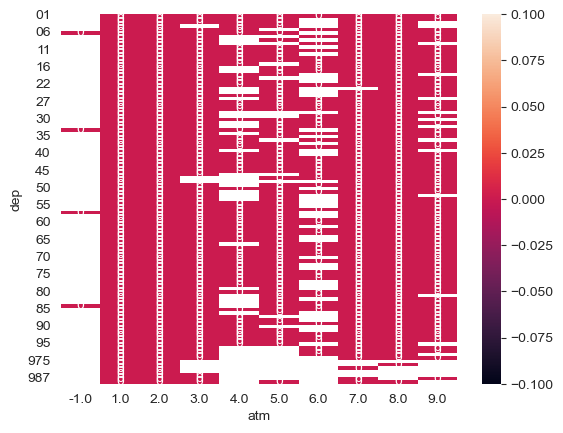

In [62]:
df_heatmap = df_accident[['grav', 'atm', 'dep']]
df_heatmap = df_heatmap.groupby(['dep', 'atm'])['grav'].nunique().reset_index()
df_heatmap = df_heatmap.pivot(index='dep', columns='atm', values='grav')
sns.heatmap(df_heatmap, annot=True)

In [245]:
#my_array = df_accident['grav'](['Blessé hospitalisé', 'Indemne', 'Blessé léger', 'Tué', -1.0, np.nan])
#my_array = my_array[~np.isnan(my_array)]


TypeError: 'Series' object is not callable

In [63]:
y = df_accident.loc[:,['Tué']]
X = df_accident.drop(['Tué'], axis=1).copy()

KeyError: "None of [Index(['Tué'], dtype='object')] are in the [columns]"

In [66]:
df_accident

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,age,senc,catv,obs,obsm,choc,manv,motor,occutc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,201 764,B01,1.0,1.0,Blessé hospitalisé,1.0,2000.0,1.0,0.0,9.0,-1.0,0.0,0,-1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202100000001,201 765,A01,1.0,1.0,Indemne,1.0,1978.0,1.0,1.0,-1.0,-1.0,0.0,0,-1.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202100000002,201 762,A01,1.0,1.0,Blessé léger,1.0,1983.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202100000002,201 763,B01,1.0,1.0,Blessé hospitalisé,1.0,1993.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202100000003,201 761,A01,1.0,1.0,Indemne,1.0,1995.0,1.0,1.0,0.0,-1.0,0.0,0,-1.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,06:10,3.0,33,33021,1.0,1.0,5.0,6.0,NaN,"44,5266190000","-0,1955440000"
56514,202100056515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,10:20,1.0,38,38405,1.0,1.0,2.0,6.0,D520,"45,3802910000","5,7049140000"
56515,202100056516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,18:00,3.0,26,26064,1.0,1.0,2.0,1.0,Route départementale 538,"44,9112100000","5,0196360000"
56516,202100056517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,10:55,1.0,33,33003,1.0,2.0,1.0,6.0,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363"


In [67]:
df_accident = df_accident.dropna()

In [68]:
df_accident


,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,age,senc,catv,obs,obsm,choc,manv,motor,occutc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long


In [69]:
df_accident = pd.concat([usagers,vehicules,lieux,caracteristiques ])
ignore_index=True
print(df_accident)

            Num_Acc id_vehicule num_veh  place  catu  grav  sexe  an_nais  \
0      202100000001     201 764     B01    1.0   1.0   3.0   1.0   2000.0   
1      202100000001     201 765     A01    1.0   1.0   1.0   1.0   1978.0   
2      202100000002     201 762     A01    1.0   1.0   4.0   1.0   1983.0   
3      202100000002     201 763     B01    1.0   1.0   3.0   1.0   1993.0   
4      202100000003     201 761     A01    1.0   1.0   1.0   1.0   1995.0   
...             ...         ...     ...    ...   ...   ...   ...      ...   
56513  202100056514         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56514  202100056515         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56515  202100056516         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56516  202100056517         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56517  202100056518         NaN     NaN    NaN   NaN   NaN   NaN      NaN   

       trajet  secu1  secu2  secu3  locp actp  etatp   age  senc  catv  obs

In [70]:
df_accident

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,age,senc,catv,obs,obsm,choc,manv,motor,occutc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,201 764,B01,1.0,1.0,3.0,1.0,2000.0,1.0,0.0,9.0,-1.0,0.0,0,-1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202100000001,201 765,A01,1.0,1.0,1.0,1.0,1978.0,1.0,1.0,-1.0,-1.0,0.0,0,-1.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202100000002,201 762,A01,1.0,1.0,4.0,1.0,1983.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202100000002,201 763,B01,1.0,1.0,3.0,1.0,1993.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202100000003,201 761,A01,1.0,1.0,1.0,1.0,1995.0,1.0,1.0,0.0,-1.0,0.0,0,-1.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,06:10,3.0,33,33021,1.0,1.0,5.0,6.0,NaN,"44,5266190000","-0,1955440000"
56514,202100056515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,10:20,1.0,38,38405,1.0,1.0,2.0,6.0,D520,"45,3802910000","5,7049140000"
56515,202100056516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,18:00,3.0,26,26064,1.0,1.0,2.0,1.0,Route départementale 538,"44,9112100000","5,0196360000"
56516,202100056517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,10:55,1.0,33,33003,1.0,2.0,1.0,6.0,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363"


In [72]:
df_accident = df_accident.drop(columns=['manv', 'id_vehicule', 'obs', 'obsm', 'choc', 'motor', 'place', 'secu1', 'secu2', 'secu3', 'locp'])


In [73]:
df_accident

,Num_Acc,num_veh,catu,grav,sexe,an_nais,trajet,actp,etatp,age,senc,catv,occutc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,B01,1.0,3.0,1.0,2000.0,1.0,0,-1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202100000001,A01,1.0,1.0,1.0,1978.0,1.0,0,-1.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202100000002,A01,1.0,4.0,1.0,1983.0,0.0,0,-1.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202100000002,B01,1.0,3.0,1.0,1993.0,0.0,0,-1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202100000003,A01,1.0,1.0,1.0,1995.0,1.0,0,-1.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,06:10,3.0,33,33021,1.0,1.0,5.0,6.0,NaN,"44,5266190000","-0,1955440000"
56514,202100056515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,10:20,1.0,38,38405,1.0,1.0,2.0,6.0,D520,"45,3802910000","5,7049140000"
56515,202100056516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,18:00,3.0,26,26064,1.0,1.0,2.0,1.0,Route départementale 538,"44,9112100000","5,0196360000"
56516,202100056517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,10:55,1.0,33,33003,1.0,2.0,1.0,6.0,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363"


In [74]:
df_accident = pd.concat([usagers,vehicules,lieux,caracteristiques ])
ignore_index=True
print(df_accident)

            Num_Acc id_vehicule num_veh  place  catu  grav  sexe  an_nais  \
0      202100000001     201 764     B01    1.0   1.0   3.0   1.0   2000.0   
1      202100000001     201 765     A01    1.0   1.0   1.0   1.0   1978.0   
2      202100000002     201 762     A01    1.0   1.0   4.0   1.0   1983.0   
3      202100000002     201 763     B01    1.0   1.0   3.0   1.0   1993.0   
4      202100000003     201 761     A01    1.0   1.0   1.0   1.0   1995.0   
...             ...         ...     ...    ...   ...   ...   ...      ...   
56513  202100056514         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56514  202100056515         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56515  202100056516         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56516  202100056517         NaN     NaN    NaN   NaN   NaN   NaN      NaN   
56517  202100056518         NaN     NaN    NaN   NaN   NaN   NaN      NaN   

       trajet  secu1  secu2  secu3  locp actp  etatp   age  senc  catv  obs

In [75]:
df_accident

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,age,senc,catv,obs,obsm,choc,manv,motor,occutc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,201 764,B01,1.0,1.0,3.0,1.0,2000.0,1.0,0.0,9.0,-1.0,0.0,0,-1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202100000001,201 765,A01,1.0,1.0,1.0,1.0,1978.0,1.0,1.0,-1.0,-1.0,0.0,0,-1.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202100000002,201 762,A01,1.0,1.0,4.0,1.0,1983.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202100000002,201 763,B01,1.0,1.0,3.0,1.0,1993.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202100000003,201 761,A01,1.0,1.0,1.0,1.0,1995.0,1.0,1.0,0.0,-1.0,0.0,0,-1.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,06:10,3.0,33,33021,1.0,1.0,5.0,6.0,NaN,"44,5266190000","-0,1955440000"
56514,202100056515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,10:20,1.0,38,38405,1.0,1.0,2.0,6.0,D520,"45,3802910000","5,7049140000"
56515,202100056516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,18:00,3.0,26,26064,1.0,1.0,2.0,1.0,Route départementale 538,"44,9112100000","5,0196360000"
56516,202100056517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,10:55,1.0,33,33003,1.0,2.0,1.0,6.0,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363"


In [76]:
df_accident_selec_Heat_map = pd.concat([usagers,vehicules,lieux,caracteristiques ])

In [77]:
df_accident_selec_Heat_map

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,age,senc,catv,obs,obsm,choc,manv,motor,occutc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,201 764,B01,1.0,1.0,3.0,1.0,2000.0,1.0,0.0,9.0,-1.0,0.0,0,-1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202100000001,201 765,A01,1.0,1.0,1.0,1.0,1978.0,1.0,1.0,-1.0,-1.0,0.0,0,-1.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202100000002,201 762,A01,1.0,1.0,4.0,1.0,1983.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202100000002,201 763,B01,1.0,1.0,3.0,1.0,1993.0,0.0,1.0,-1.0,-1.0,0.0,0,-1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202100000003,201 761,A01,1.0,1.0,1.0,1.0,1995.0,1.0,1.0,0.0,-1.0,0.0,0,-1.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,06:10,3.0,33,33021,1.0,1.0,5.0,6.0,NaN,"44,5266190000","-0,1955440000"
56514,202100056515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,10:20,1.0,38,38405,1.0,1.0,2.0,6.0,D520,"45,3802910000","5,7049140000"
56515,202100056516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,18:00,3.0,26,26064,1.0,1.0,2.0,1.0,Route départementale 538,"44,9112100000","5,0196360000"
56516,202100056517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,10:55,1.0,33,33003,1.0,2.0,1.0,6.0,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363"


In [81]:
df_accident_selec_Heat_map['voie'].unique()

array([nan, '981', '20', ..., 'RT209', 'Boulevard Alexandra David-Neel',
       'RD820'], dtype=object)

In [82]:
print(df_accident_selec_Heat_map['voie'].unique())


[nan '981' '20' ... 'RT209' 'Boulevard Alexandra David-Neel' 'RD820']


In [83]:
import pandas as pd

pd.set_option('display.max_rows', None)  # afficher toutes les lignes

unique_voie = df_accident_selec_Heat_map['voie'].unique().tolist()

print(unique_voie)

[nan, '981', '20', 'GENERAL GALLIENI (BOULEVARD DU)', 'PARIS. ROUTE DE', 'REPUBLIQUE (PLACE DE LA)', '1', 'REPUBLIQUE (RUE DE LA) N° 47 A 85', 'VAILLANT COUTURIER (AVENUE PAUL)', '2', '39', '19', '15', '26', '201', 'AV FRANCOIS MITTERRAND', 'CARNOT (AVENUE)', 'RUE DES 5 EME ET 15 EME B.C.P.', 'NAVES (RUE DE)', '435', '6', '965', 'GOSSELIN ( RUE ALFRED )', 'FAIDHERBE ( BOULEVARD )', 'SAINTE CROIX (RUE DU FAUBOURG)', 'CD940', 'RN 184', 'PRADO (AVENUE DU)', 'GRANDS CHAMPS RUE DES', 'LASHERMES (RUE)', '902', 'PISANI (boulevard Edgard)', 'CHARLES DE GAULLE (AV)', '406', 'D6', 'JEAN JAURES (AVE) 55 A 129', 'SAINT HONORE', '184', "LATTRE DE TASSIGNY AVENUE DE L'", 'PASTEUR(PLACE)', 'SQUARE DE L HERACLES', 'BOBILLOT (RUE DU SERGENT)', 'BRUYERES (RTE DES...N°97et+ ET 66 et+ )', 'RECHERCHANT (RUE ADRIEN) (2)', 'HUBERT DE LISLE(BOULEVARD)', 'ANCIENNE RN 1', 'RIVE DE GIER (DE) (RTE)', 'NOTRE DAME DU THIL (RUE)', '21', 'BERTHO ( RUE HENRI )', 'LILAS ( AVENUE DES )', '675', 'LILATTES', 'DIEDERICHS',

In [86]:
pd.reset_option('display.max_rows')

In [90]:
df_accident_selec_Heat_map = df_accident_selec_Heat_map.drop(columns=['manv', 'id_vehicule', 'obs', 'choc', 'motor', 'place', 'secu1', 'secu2', 'secu3', 'locp', 'occutc','an', 'adr', 'com','lat', 'long','voie', 'v1','v2','lartpc', 'larrout', 'pr1','pr', 'plan','prof','vosp', ])

In [91]:
df_accident_selec_Heat_map

,Num_Acc,num_veh,catu,grav,sexe,an_nais,trajet,actp,etatp,age,senc,catv,obsm,catr,circ,nbv,surf,infra,situ,vma,jour,mois,hrmn,lum,dep,agg,int,atm,col
0,202100000001,B01,1.0,3.0,1.0,2000.0,1.0,0,-1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202100000001,A01,1.0,1.0,1.0,1978.0,1.0,0,-1.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202100000002,A01,1.0,4.0,1.0,1983.0,0.0,0,-1.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202100000002,B01,1.0,3.0,1.0,1993.0,0.0,0,-1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202100000003,A01,1.0,1.0,1.0,1995.0,1.0,0,-1.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,06:10,3.0,33,1.0,1.0,5.0,6.0
56514,202100056515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,10:20,1.0,38,1.0,1.0,2.0,6.0
56515,202100056516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,18:00,3.0,26,1.0,1.0,2.0,1.0
56516,202100056517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,10:55,1.0,33,1.0,2.0,1.0,6.0


<AxesSubplot:xlabel='atm', ylabel='dep'>

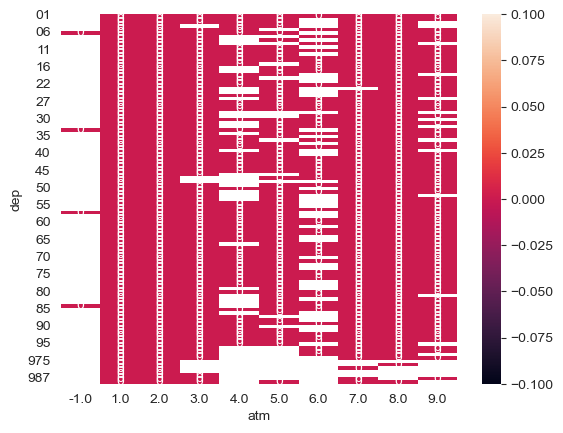

In [92]:
df_heatmap = df_accident_selec_Heat_map[['grav', 'atm', 'dep']]
df_heatmap = df_heatmap.groupby(['dep', 'atm'])['grav'].nunique().reset_index()
df_heatmap = df_heatmap.pivot(index='dep', columns='atm', values='grav')
sns.heatmap(df_heatmap, annot=True)

In [94]:
df_accident_selec_Heat_map = df_accident_selec_Heat_map.drop(columns=['an_nais', 'jour','vma'])

<AxesSubplot:xlabel='atm', ylabel='dep'>

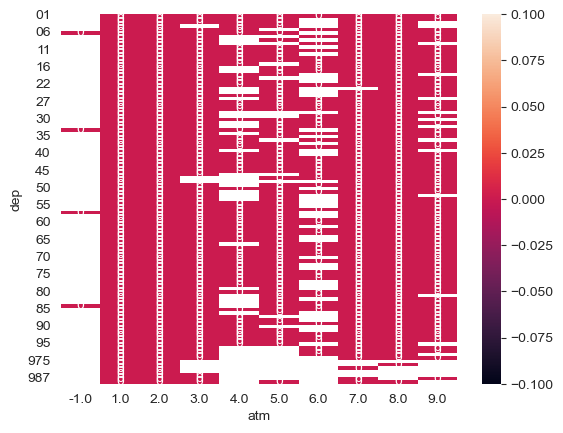

In [95]:
df_heatmap = df_accident_selec_Heat_map[['grav', 'atm', 'dep']]
df_heatmap = df_heatmap.groupby(['dep', 'atm'])['grav'].nunique().reset_index()
df_heatmap = df_heatmap.pivot(index='dep', columns='atm', values='grav')
sns.heatmap(df_heatmap, annot=True)

<AxesSubplot:xlabel='atm', ylabel='Num_Acc'>

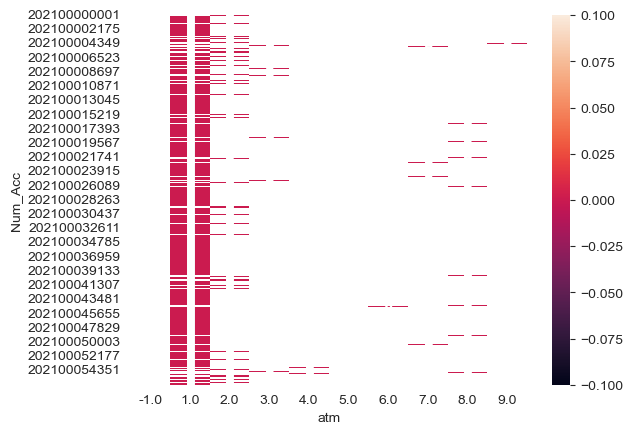

In [99]:
df_heatmap = df_accident_selec_Heat_map[['grav','atm', 'Num_Acc']]
df_heatmap = df_heatmap.groupby(['Num_Acc','atm'])['grav'].nunique().reset_index()
df_heatmap = df_heatmap.pivot(index='Num_Acc', columns='atm', values='grav')
sns.heatmap(df_heatmap, annot=True)

In [100]:
df_accident_selec_Heat_map = df_accident_selec_Heat_map.fillna(0)

In [101]:
df_accident_selec_Heat_map

,Num_Acc,num_veh,catu,grav,sexe,trajet,actp,etatp,age,senc,catv,obsm,catr,circ,nbv,surf,infra,situ,mois,hrmn,lum,dep,agg,int,atm,col
0,202100000001,B01,1.0,3.0,1.0,1.0,0,-1.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
1,202100000001,A01,1.0,1.0,1.0,1.0,0,-1.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,202100000002,A01,1.0,4.0,1.0,0.0,0,-1.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
3,202100000002,B01,1.0,3.0,1.0,0.0,0,-1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,202100000003,A01,1.0,1.0,1.0,1.0,0,-1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,06:10,3.0,33,1.0,1.0,5.0,6.0
56514,202100056515,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10:20,1.0,38,1.0,1.0,2.0,6.0
56515,202100056516,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18:00,3.0,26,1.0,1.0,2.0,1.0
56516,202100056517,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10:55,1.0,33,1.0,2.0,1.0,6.0


<AxesSubplot:xlabel='atm', ylabel='dep'>

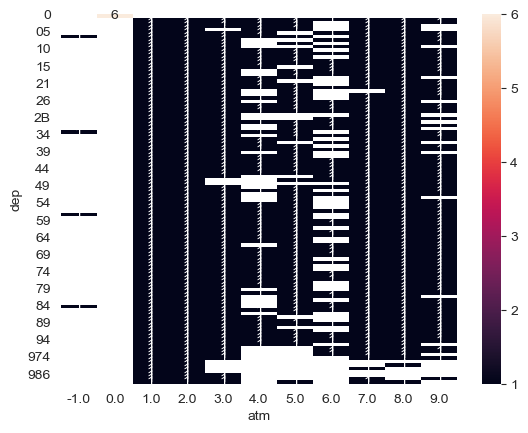

In [102]:
df_heatmap = df_accident_selec_Heat_map[['grav', 'atm', 'dep']]
df_heatmap = df_heatmap.groupby(['dep', 'atm'])['grav'].nunique().reset_index()
df_heatmap = df_heatmap.pivot(index='dep', columns='atm', values='grav')
sns.heatmap(df_heatmap, annot=True)

<AxesSubplot:xlabel='atm', ylabel='catu'>

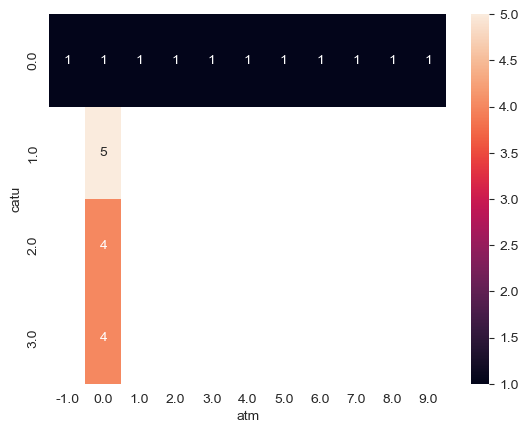

In [103]:
df_heatmap = df_accident_selec_Heat_map[['grav', 'atm', 'catu']]
df_heatmap = df_heatmap.groupby(['catu', 'atm'])['grav'].nunique().reset_index()
df_heatmap = df_heatmap.pivot(index='catu', columns='atm', values='grav')
sns.heatmap(df_heatmap, annot=True)

In [105]:
df_accident_selec_Heat_map['grav'] = df_accident_selec_Heat_map['grav'].replace({
1:'Indemne',
2:'Tué',
3:'Blessé hospitalisé',
4:'Blessé léger'})

In [106]:
df_accident_selec_Heat_map

,Num_Acc,num_veh,catu,grav,sexe,trajet,actp,etatp,age,senc,catv,obsm,catr,circ,nbv,surf,infra,situ,mois,hrmn,lum,dep,agg,int,atm,col
0,202100000001,B01,1.0,Blessé hospitalisé,1.0,1.0,0,-1.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
1,202100000001,A01,1.0,Indemne,1.0,1.0,0,-1.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,202100000002,A01,1.0,Blessé léger,1.0,0.0,0,-1.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
3,202100000002,B01,1.0,Blessé hospitalisé,1.0,0.0,0,-1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,202100000003,A01,1.0,Indemne,1.0,1.0,0,-1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,06:10,3.0,33,1.0,1.0,5.0,6.0
56514,202100056515,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10:20,1.0,38,1.0,1.0,2.0,6.0
56515,202100056516,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18:00,3.0,26,1.0,1.0,2.0,1.0
56516,202100056517,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10:55,1.0,33,1.0,2.0,1.0,6.0


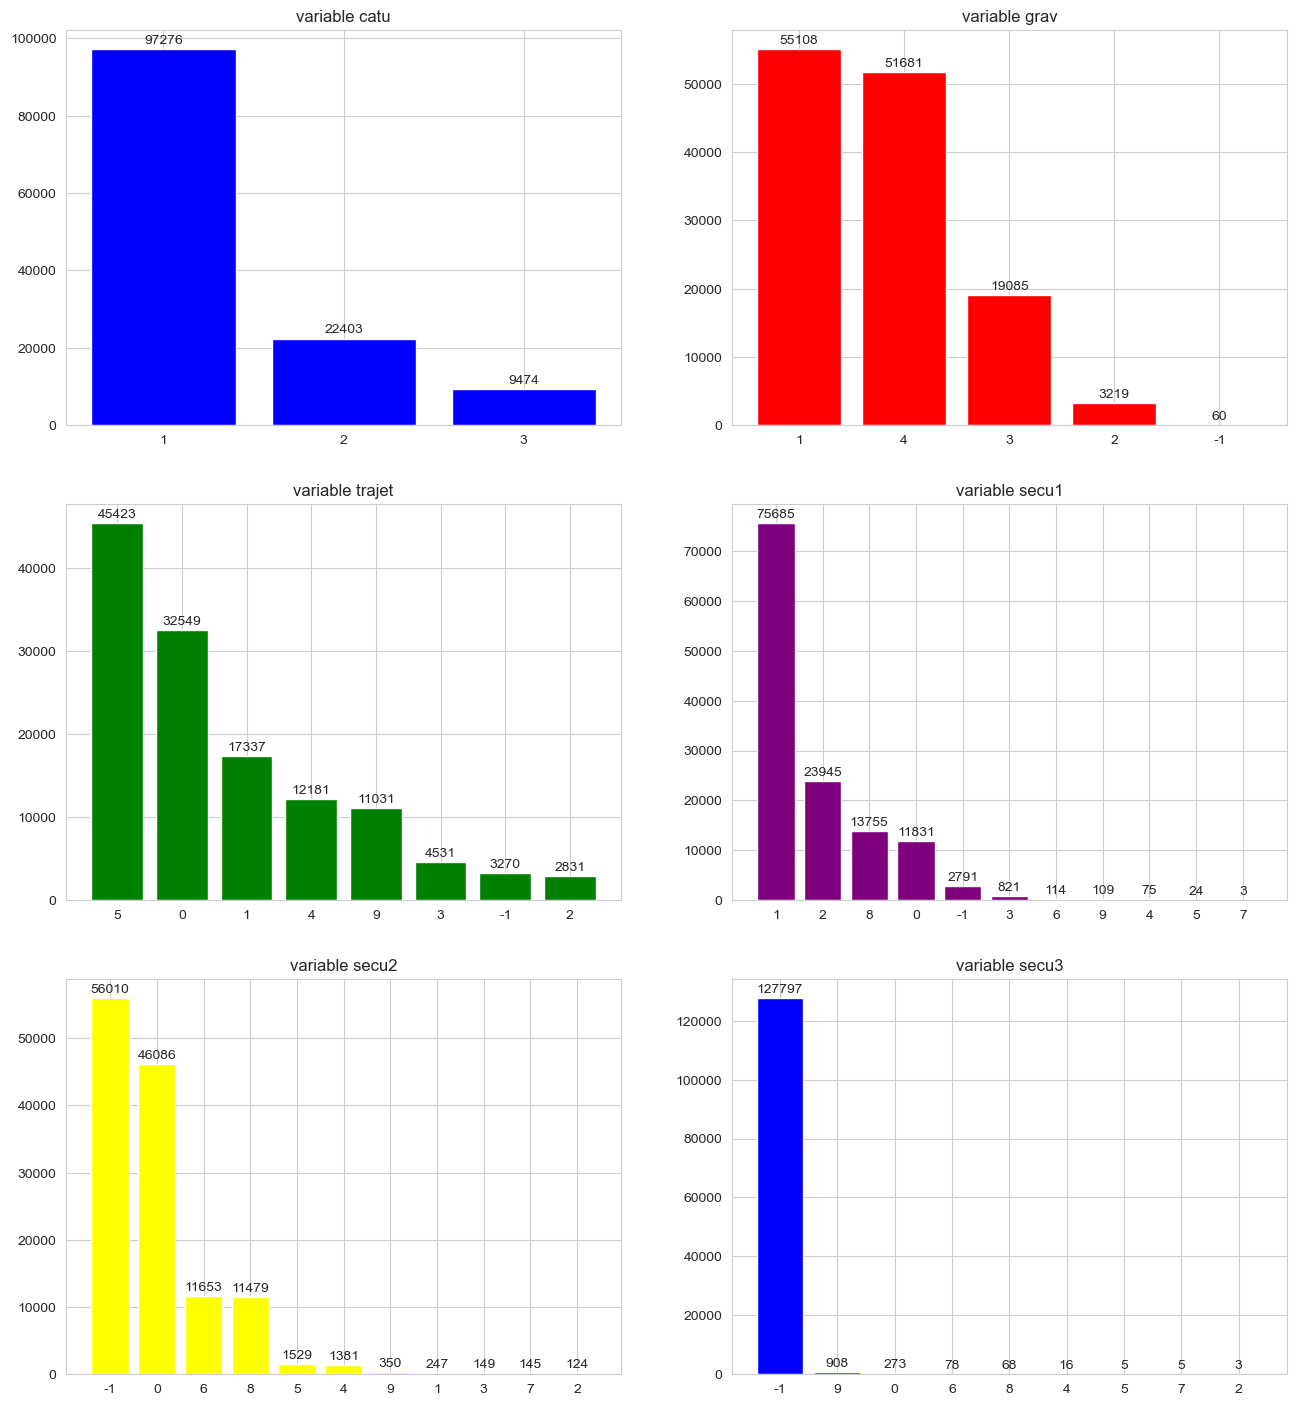

In [108]:
def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(40), cm_to_inch(60)));

def histo(variable, pos, couleur):

    xi = [str(x) for x in usagers[variable].value_counts().index.tolist()];
    yi = usagers[variable].value_counts().tolist();

    plt.subplot(4,2,pos);
    plt.bar(xi,yi, color=couleur);
    for x,y in zip(xi,yi): plt.annotate("{:.0f}".format(y),(x,y),textcoords="offset points",xytext=(0,4), ha='center')  
    plt.title("variable "+variable)

histo('catu', 1, 'blue')
histo('grav', 2, 'red')
histo('trajet', 3, 'green')
histo('secu1', 4, 'purple')
histo('secu2', 5, 'yellow')
histo('secu3', 6, 'blue')

plt.show();

In [109]:
usagers1 = usagers.groupby(by=['Num_Acc']).sum()

In [110]:
usagers1

,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,etatp,age
Num_Acc,,,,,,,,,,,,
202100000001,2,2,4,2,3978.0,2,1,8,-2,0,-2,64.0
202100000002,2,2,7,2,3976.0,0,2,-2,-2,0,-2,66.0
202100000003,11,4,4,3,3954.0,5,1,-1,-2,3,0,88.0
202100000004,2,2,3,3,4014.0,4,-1,-1,-2,-2,-2,28.0
202100000005,2,2,3,1,1997.0,0,9,-2,-2,-2,-2,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202100056514,1,1,4,1,1998.0,5,0,-1,-1,0,-1,23.0
202100056515,1,1,3,1,1963.0,5,1,-1,-1,0,-1,58.0
202100056516,2,2,8,2,3977.0,5,2,-2,-2,0,-2,65.0


In [111]:
vehicules1=vehicules.groupby(by=['Num_Acc']).sum()

In [112]:
vehicules1

,senc,catv,obs,obsm,choc,manv,motor,occutc
Num_Acc,,,,,,,,
202100000001,2,8,0,11,4,18,6,0.0
202100000002,0,14,2,4,2,10,0,0.0
202100000003,1,7,0,1,3,1,1,0.0
202100000004,0,67,0,2,10,34,6,0.0
202100000005,4,14,0,4,5,1,0,0.0
...,...,...,...,...,...,...,...,...
202100056514,2,7,5,0,3,0,1,0.0
202100056515,1,7,6,0,1,1,1,0.0
202100056516,3,14,0,4,4,6,2,0.0


In [113]:
lieux1=lieux.groupby(by=['Num_Acc']).sum()

In [114]:
lieux1

,catr,v1,circ,nbv,vosp,prof,plan,surf,infra,situ,vma
Num_Acc,,,,,,,,,,,
202100000001,3,-1,2,2,0,1,1,1,0,1,80
202100000002,3,0,2,2,0,1,1,1,0,1,80
202100000003,4,0,2,2,0,1,1,1,0,1,50
202100000004,3,0,2,4,0,1,1,1,0,1,50
202100000005,7,-1,2,2,-1,1,1,1,0,1,50
...,...,...,...,...,...,...,...,...,...,...,...
202100056514,1,-1,3,4,0,2,3,2,9,2,130
202100056515,3,0,2,2,0,1,1,5,0,3,80
202100056516,3,-1,2,2,0,2,2,2,0,1,80


In [116]:
caracteristiques1=caracteristiques.groupby(by=['Num_Acc']).sum()

In [117]:
caracteristiques1

,jour,mois,an,lum,agg,int,atm,col
Num_Acc,,,,,,,,
202100000001,30,11,2021,2,1,1,1,1
202100000002,25,9,2021,1,1,3,1,3
202100000003,15,7,2021,1,2,1,7,6
202100000004,27,3,2021,5,2,2,3,6
202100000005,25,2,2021,5,2,1,1,2
...,...,...,...,...,...,...,...,...
202100056514,1,1,2021,3,1,1,5,6
202100056515,1,1,2021,1,1,1,2,6
202100056516,1,1,2021,3,1,1,2,1


In [119]:
df_accident_selec_Heat_map_2 = pd.concat([usagers1,vehicules1,lieux1,caracteristiques1])
ignore_index=True


# Je veux savoir et visualiser s'il y a des valeurs manquantes dans ma data frame 'df_accident_selec_Heat_map_2' pour la création de Heat map

In [120]:
df_accident_selec_Heat_map_2

,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,etatp,age,senc,catv,obs,obsm,choc,manv,motor,occutc,catr,v1,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,agg,int,atm,col
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202100000001,2.0,2.0,4.0,2.0,3978.0,2.0,1.0,8.0,-2.0,0.0,-2.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202100000002,2.0,2.0,7.0,2.0,3976.0,0.0,2.0,-2.0,-2.0,0.0,-2.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202100000003,11.0,4.0,4.0,3.0,3954.0,5.0,1.0,-1.0,-2.0,3.0,0.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202100000004,2.0,2.0,3.0,3.0,4014.0,4.0,-1.0,-1.0,-2.0,-2.0,-2.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202100000005,2.0,2.0,3.0,1.0,1997.0,0.0,9.0,-2.0,-2.0,-2.0,-2.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202100056514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,3.0,1.0,1.0,5.0,6.0
202100056515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,1.0,1.0,1.0,2.0,6.0
202100056516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021.0,3.0,1.0,1.0,2.0,1.0


# On voit bcp des valeurs manquantes ou invalides dans ma data frame 'df_accident_selec_Heat_map_2.columns'. Ces valeurs 'NaN' peuvent causer des problèmes lors de l'analyse des données, il est donc important de les traiter correctement en les supprimant ou en les remplaçant par d'autres valeurs valides.

In [122]:
for i in df_accident_selec_Heat_map_2.columns.tolist():
    print("")
    print("Il y a",df_accident_selec_Heat_map_2[i].isnull().sum(axis = 0),"valeurs manquantes dans la variable",i,"(soit",round(df_accident_selec_Heat_map_2[i].isnull().sum(axis = 0)/df_accident_selec_Heat_map_2.shape[0],4)*100,"%) ")


Il y a 169554 valeurs manquantes dans la variable place (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable catu (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable grav (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable sexe (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable an_nais (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable trajet (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable secu1 (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable secu2 (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable secu3 (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable locp (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable etatp (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable age (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable senc (soit 75.0 %) 

Il y a 169554 valeurs manquantes dans la variable catv (soit 75.0 %

# Pourtant si on visualise les 4 data setes: usagers1, lieux1, vehicules1, caracteristiques1 individualement il n'y a pas valeurs manquantes dans la variable 'i' :

In [123]:
for i in caracteristiques1.columns.tolist():
    print("")
    print("Il y a",caracteristiques1[i].isnull().sum(axis = 0),"valeurs manquantes dans la variable",i,"(soit",round(caracteristiques1[i].isnull().sum(axis = 0)/caracteristiques1.shape[0],4)*100,"%) ")


Il y a 0 valeurs manquantes dans la variable jour (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable mois (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable an (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable lum (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable agg (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable int (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable atm (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable col (soit 0.0 %) 


In [124]:
for i in usagers1.columns.tolist():
    print("")
    print("Il y a",usagers1[i].isnull().sum(axis = 0),"valeurs manquantes dans la variable",i,"(soit",round(usagers1[i].isnull().sum(axis = 0)/usagers1.shape[0],4)*100,"%) ")


Il y a 0 valeurs manquantes dans la variable place (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable catu (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable grav (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable sexe (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable an_nais (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable trajet (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable secu1 (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable secu2 (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable secu3 (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable locp (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable etatp (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable age (soit 0.0 %) 


In [126]:
for i in lieux1.columns.tolist():
    print("")
    print("Il y a",lieux1[i].isnull().sum(axis = 0),"valeurs manquantes dans la variable",i,"(soit",round(lieux1[i].isnull().sum(axis = 0)/lieux1.shape[0],4)*100,"%) ")


Il y a 0 valeurs manquantes dans la variable catr (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable v1 (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable circ (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable nbv (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable vosp (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable prof (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable plan (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable surf (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable infra (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable situ (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable vma (soit 0.0 %) 


In [127]:
for i in vehicules1.columns.tolist():
    print("")
    print("Il y a",vehicules1[i].isnull().sum(axis = 0),"valeurs manquantes dans la variable",i,"(soit",round(vehicules1[i].isnull().sum(axis = 0)/vehicules1.shape[0],4)*100,"%) ")


Il y a 0 valeurs manquantes dans la variable senc (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable catv (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable obs (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable obsm (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable choc (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable manv (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable motor (soit 0.0 %) 

Il y a 0 valeurs manquantes dans la variable occutc (soit 0.0 %) 


# On me dit qu'il y a une erreur ligne 71 dans une des 4 fichiers que j'ai en trin de cherger : 

In [129]:
# Charger les 4 datasets
vehicules01 = pd.read_csv('vehicules-2021.csv', encoding='latin-1')
lieux01 = pd.read_csv('lieux-2021.csv', encoding='latin-1')
usagers01 = pd.read_csv('usagers-2021.csv', encoding='latin-1')
caracteristiques01 = pd.read_csv('caracteristiques-2021.csv', encoding='latin-1')

# Renommer les colonnes pour éviter les doublons
vehicules01.rename(columns={'numAcc': 'Num_Acc'}, inplace=True)
usagers01.rename(columns={'numAcc': 'Num_Acc'}, inplace=True)
lieux01.rename(columns={'numAcc': 'Num_Acc'}, inplace=True)
caracteristiques01.rename(columns={'Num_Acc': 'Num_Acc1'}, inplace=True)

# Fusionner les datasets
df_accident_2 = pd.merge(caracteristiques01, lieux01, on='Num_Acc')
df_accident_2 = pd.merge(df_accident_2, usagers01, on='Num_Acc')
df_accident_2 = pd.merge(df_accident_2, vehicules01, on=['Num_Acc', 'num_veh'])

# Supprimer les colonnes inutiles
df_accident_2.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis=1, inplace=True)

# Remplacer les NaN par des valeurs vides
df_accident_2.fillna('', inplace=True)


ParserError: Error tokenizing data. C error: Expected 1 fields in line 71, saw 2


# On va essayer de trouver cette ligne dans un des fichier, commencent par 'vehicules-2021.csv' : 

In [130]:
try:
    df_cherche_erreur_ligne71 = pd.read_csv('vehicules-2021.csv', error_bad_lines=False)
except Exception as e:
    print(e)

# Trouver la ligne mentionnée dans l'erreur (ligne 71 dans votre cas)
with open('vehicules-2021.csv', 'r') as f:
    for i, line in enumerate(f):
        if i == 70:
            print("Ligne 71:", line)
            break

Ligne 71: "202100000041";"201Â 687";"A01";"1";"7";"0";"2";"1";"1";"1";""



C:\Users\arnoa\AppData\Local\Temp\ipykernel_4840\540730022.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_cherche_erreur_ligne71 = pd.read_csv('vehicules-2021.csv', error_bad_lines=False)


In [131]:
try:
    df_cherche_erreur_ligne71 = pd.read_csv('lieux-2021.csv', error_bad_lines=False)
except Exception as e:
    print(e)

# Trouver la ligne mentionnée dans l'erreur (ligne 71 dans votre cas)
with open('lieux-2021.csv', 'r') as f:
    for i, line in enumerate(f):
        if i == 70:
            print("Ligne 71:", line)
            break

Ligne 71: "202100000070";"4";"N/A";" -1";"N/A";"2";"2";" -1";"1";"(1)";"(1)";"1";"";"5,5";"1";"0";"1";" -1"



C:\Users\arnoa\AppData\Local\Temp\ipykernel_4840\866691131.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_cherche_erreur_ligne71 = pd.read_csv('lieux-2021.csv', error_bad_lines=False)
b'Skipping line 71: expected 1 fields, saw 2\nSkipping line 423: expected 1 fields, saw 2\nSkipping line 625: expected 1 fields, saw 2\nSkipping line 646: expected 1 fields, saw 2\nSkipping line 716: expected 1 fields, saw 2\nSkipping line 791: expected 1 fields, saw 2\nSkipping line 914: expected 1 fields, saw 2\nSkipping line 916: expected 1 fields, saw 2\nSkipping line 929: expected 1 fields, saw 2\nSkipping line 946: expected 1 fields, saw 2\nSkipping line 1102: expected 1 fields, saw 2\nSkipping line 1166: expected 1 fields, saw 2\nSkipping line 1301: expected 1 fields, saw 2\nSkipping line 1330: expected 1 fields, saw 2\nSkipping line 1386: expected 1 fields, saw 2\nSkipping line 1770: expected 1 f

In [132]:
try:
    df_cherche_erreur_ligne71 = pd.read_csv('vehicules-2021.csv', error_bad_lines=False)
except Exception as e:
    print(e)

# Trouver la ligne mentionnée dans l'erreur (ligne 71 dans votre cas)
with open('vehicules-2021.csv', 'r') as f:
    for i, line in enumerate(f):
        if i == 70:
            print("Ligne 71:", line)
            break

Ligne 71: "202100000041";"201Â 687";"A01";"1";"7";"0";"2";"1";"1";"1";""



C:\Users\arnoa\AppData\Local\Temp\ipykernel_4840\540730022.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_cherche_erreur_ligne71 = pd.read_csv('vehicules-2021.csv', error_bad_lines=False)


In [133]:
df_cherche_erreur_ligne71 = pd.read_csv('vehicules-2021.csv', on_bad_lines='skip')


In [134]:
# Charger les 4 datasets
vehicules01 = pd.read_csv('vehicules-2021.csv', on_bad_lines='skip', encoding='latin-1')
lieux01 = pd.read_csv('lieux-2021.csv', encoding='latin-1')
usagers01 = pd.read_csv('usagers-2021.csv', encoding='latin-1')
caracteristiques01 = pd.read_csv('caracteristiques-2021.csv', encoding='latin-1')

# Renommer les colonnes pour éviter les doublons
vehicules01.rename(columns={'numAcc': 'Num_Acc'}, inplace=True)
usagers01.rename(columns={'numAcc': 'Num_Acc'}, inplace=True)
lieux01.rename(columns={'numAcc': 'Num_Acc'}, inplace=True)
caracteristiques01.rename(columns={'Num_Acc': 'Num_Acc1'}, inplace=True)

# Fusionner les datasets
df_accident_2 = pd.merge(caracteristiques01, lieux01, on='Num_Acc')
df_accident_2 = pd.merge(df_accident_2, usagers01, on='Num_Acc')
df_accident_2 = pd.merge(df_accident_2, vehicules01, on=['Num_Acc', 'num_veh'])

# Supprimer les colonnes inutiles
df_accident_2.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis=1, inplace=True)

# Remplacer les NaN par des valeurs vides
df_accident_2.fillna('', inplace=True)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 71, saw 2


In [135]:
vehicules01 = pd.read_csv('vehicules-2021.csv', on_bad_lines='skip', encoding='latin-1')

In [136]:
lieux01 = pd.read_csv('lieux-2021.csv', encoding='latin-1')
usagers01 = pd.read_csv('usagers-2021.csv', encoding='latin-1')
caracteristiques01 = pd.read_csv('caracteristiques-2021.csv', encoding='latin-1')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 71, saw 2


In [137]:
lieux01 = pd.read_csv('lieux-2021.csv', on_bad_lines='skip', encoding='latin-1') 

In [138]:
usagers01 = pd.read_csv('usagers-2021.csv', on_bad_lines='skip', encoding='latin-1')

In [140]:
caracteristiques01 = pd.read_csv('carcteristiques-2021.csv',on_bad_lines='skip', encoding='latin-1')

In [143]:
# Renommer les colonnes pour éviter les doublons
vehicules01.rename(columns={'Num_Acc': 'Num_Acc'}, inplace=True)
usagers01.rename(columns={'Num_Acc': 'Num_Acc'}, inplace=True)
lieux01.rename(columns={'Num_Acc': 'Num_Acc'}, inplace=True)
caracteristiques01.rename(columns={'Num_Acc': 'Num_Acc1'}, inplace=True)

# Fusionner les datasets
df_accident_2 = pd.merge(caracteristiques01, lieux01, on='Num_Acc')
df_accident_2 = pd.merge(df_accident_2, usagers01, on='Num_Acc')
df_accident_2 = pd.merge(df_accident_2, vehicules01, on=['Num_Acc', 'num_veh'])

# Supprimer les colonnes inutiles
df_accident_2.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis=1, inplace=True)

# Remplacer les NaN par des valeurs vides
df_accident_2.fillna('', inplace=True)

KeyError: 'Num_Acc'

In [142]:
lieux01

,"Num_Acc;""catr"";""voie"";""v1"";""v2"";""circ"";""nbv"";""vosp"";""prof"";""pr"";""pr1"";""plan"";""lartpc"";""larrout"";""surf"";""infra"";""situ"";""vma"""
0,"202100000001;""3"";""981"";"" -1"";""N/A"";""2"";""2"";""0""..."
1,"202100000002;""3"";""20"";""0"";""E"";""2"";""2"";""0"";""1"";..."
2,"202100000003;""4"";""GENERAL GALLIENI (BOULEVARD ..."
3,"202100000004;""3"";""GENERAL GALLIENI (BOULEVARD ..."
4,"202100000005;""7"";""PARIS. ROUTE DE"";"" -1"";""N/A""..."
...,...
55936,"202100056514;""1"";""65"";"" -1"";""N/A"";""3"";""4"";""0"";..."
55937,"202100056515;""3"";""520"";""0"";""D"";""2"";""2"";""0"";""1""..."
55938,"202100056516;""3"";""538"";"" -1"";""N/A"";""2"";""2"";""0""..."
55939,"202100056517;""4"";""N/A"";"" -1"";""N/A"";""2"";""2"";""0""..."


In [144]:
usagers01

,"Num_Acc;""id_vehicule"";""num_veh"";""place"";""catu"";""grav"";""sexe"";""an_nais"";""trajet"";""secu1"";""secu2"";""secu3"";""locp"";""actp"";""etatp"""
0,"202100000001;""201Â 764"";""B01"";""1"";""1"";""3"";""1"";..."
1,"202100000001;""201Â 765"";""A01"";""1"";""1"";""1"";""1"";..."
2,"202100000002;""201Â 762"";""A01"";""1"";""1"";""4"";""1"";..."
3,"202100000002;""201Â 763"";""B01"";""1"";""1"";""3"";""1"";..."
4,"202100000003;""201Â 761"";""A01"";""1"";""1"";""1"";""1"";..."
...,...
129148,"202100056516;""100Â 885"";""A01"";""1"";""1"";""4"";""1"";..."
129149,"202100056516;""100Â 886"";""B01"";""1"";""1"";""4"";""1"";..."
129150,"202100056517;""100Â 884"";""A01"";""1"";""1"";""3"";""1"";..."
129151,"202100056518;""100Â 882"";""A01"";""1"";""1"";""3"";""1"";..."


In [145]:
caracteristiques01

,,"Num_Acc;""jour"";""mois"";""an"";""hrmn"";""lum"";""dep"";""com"";""agg"";""int"";""atm"";""col"";""adr"";""lat"";""long"""
"202100000001;""30"";""11"";""2021"";""07:32"";""2"";""30"";""30319"";""1"";""1"";""1"";""1"";""CD 981"";""44","0389580000"";""4","3480220000"""
"202100000002;""25"";""09"";""2021"";""14:20"";""1"";""51"";""51544"";""1"";""3"";""1"";""3"";""Aire de repos croisement D20E9 aprÃ¨s sortie D977"";""49","2421290000"";""4","5545460000"""
"202100000003;""15"";""07"";""2021"";""07:55"";""1"";""85"";""85048"";""2"";""1"";""7"";""6"";""15 rue FranÃ§ois Nicolas"";""46","9219500000"";"" -0","9644600000"""
"202100000004;""27"";""03"";""2021"";""19:45"";""5"";""93"";""93005"";""2"";""2"";""3"";""6"";""Route de Mitry"";""48","9493634583"";""2","5196639908"""
"202100000005;""25"";""02"";""2021"";""07:20"";""5"";""76"";""76429"";""2"";""1"";""1"";""2"";""PARIS. ROUTE DE"";""49","4083800000"";""1","1458100000"""
...,...,...
"202100056514;""1"";""01"";""2021"";""06:10"";""3"";""33"";""33021"";""1"";""1"";""5"";""6"";""N/A"";""44","5266190000"";"" -0","1955440000"""
"202100056515;""1"";""01"";""2021"";""10:20"";""1"";""38"";""38405"";""1"";""1"";""2"";""6"";""D520"";""45","3802910000"";""5","7049140000"""
"202100056516;""1"";""01"";""2021"";""18:00"";""3"";""26"";""26064"";""1"";""1"";""2"";""1"";""Route dÃ©partementale 538"";""44","9112100000"";""5","0196360000"""
"202100056517;""1"";""01"";""2021"";""10:55"";""1"";""33"";""33003"";""1"";""2"";""1"";""6"";""Voie rapide Bassens Ambes"";""44","9542747363"";"" -0","5179211363"""


In [148]:
# Charger les 4 datasets
vehicules01 = pd.read_csv("vehicules-2021.csv",delimiter=";")
lieux01 = pd.read_csv("lieux-2021.csv", delimiter=";")
usagers01 = pd.read_csv("usagers-2021.csv",delimiter=";")
caracteristiques01 = pd.read_csv("carcteristiques-2021.csv",delimiter=";")

# Renommer les colonnes pour éviter les doublons
#vehicules01.rename(columns={'numAcc': 'Num_Acc'}, inplace=True)
#usagers01.rename(columns={'numAcc': 'Num_Acc'}, inplace=True)
#lieux01.rename(columns={'numAcc': 'Num_Acc'}, inplace=True)
#caracteristiques01.rename(columns={'Num_Acc': 'Num_Acc1'}, inplace=True)

# Fusionner les datasets
df_accident_2 = pd.merge(caracteristiques01, lieux01, on='Num_Acc')
df_accident_2 = pd.merge(df_accident_2, usagers01, on='Num_Acc')
df_accident_2 = pd.merge(df_accident_2, vehicules01, on=['Num_Acc', 'num_veh'])

# Supprimer les colonnes inutiles
#df_accident_2.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis=1, inplace=True)

# Remplacer les NaN par des valeurs vides
df_accident_2.fillna('', inplace=True)


In [150]:
df_accident_2

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,id_vehicule_x,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,id_vehicule_y,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202100000001,30,11,2021,07:32,2,30,30319,1,1,1,1,CD 981,"44,0389580000","4,3480220000",3,981,-1,,2,2,0,1,(1),(1),1,,-1,1,0,1,80,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1,201 764,1,1,0,2,1,1,5,
1,202100000001,30,11,2021,07:32,2,30,30319,1,1,1,1,CD 981,"44,0389580000","4,3480220000",3,981,-1,,2,2,0,1,(1),(1),1,,-1,1,0,1,80,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1,201 765,1,7,0,9,3,17,1,
2,202100000002,25,9,2021,14:20,1,51,51544,1,3,1,3,Aire de repos croisement D20E9 après sortie D977,"49,2421290000","4,5545460000",3,20,0,E,2,2,0,1,0,10,1,,-1,1,0,1,80,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1,201 762,0,7,2,2,1,1,0,
3,202100000002,25,9,2021,14:20,1,51,51544,1,3,1,3,Aire de repos croisement D20E9 après sortie D977,"49,2421290000","4,5545460000",3,20,0,E,2,2,0,1,0,10,1,,-1,1,0,1,80,201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1,201 763,0,7,0,2,1,9,0,
4,202100000003,15,7,2021,07:55,1,85,85048,2,1,7,6,15 rue François Nicolas,"46,9219500000","-0,9644600000",4,GENERAL GALLIENI (BOULEVARD DU),0,,2,2,0,1,(1),(1),1,,-1,1,0,1,50,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1,201 761,1,7,0,1,3,1,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129148,202100056516,1,1,2021,18:00,3,26,26064,1,1,2,1,Route départementale 538,"44,9112100000","5,0196360000",3,538,-1,,2,2,0,2,49,24,2,,-1,2,0,1,80,100 885,A01,1,1,4,1,1975.0,0,1,-1,-1,0,0,-1,100 885,1,7,0,2,1,5,1,
129149,202100056516,1,1,2021,18:00,3,26,26064,1,1,2,1,Route départementale 538,"44,9112100000","5,0196360000",3,538,-1,,2,2,0,2,49,24,2,,-1,2,0,1,80,100 886,B01,1,1,4,1,2002.0,5,1,-1,-1,0,0,-1,100 886,2,7,0,2,3,1,1,
129150,202100056517,1,1,2021,10:55,1,33,33003,1,2,1,6,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363",4,,-1,,2,2,0,1,(1),(1),2,,-1,2,5,3,80,100 884,A01,1,1,3,1,1999.0,0,0,-1,-1,0,0,-1,100 884,2,7,6,0,5,6,1,
129151,202100056518,2,1,2021,18:00,3,78,78423,1,1,3,1,VOLTA (AVENUE),"48,7966700000","2,0505000000",3,129,0,,2,2,0,1,2,290,1,,-1,2,0,1,70,100 882,A01,1,1,3,1,1968.0,3,1,0,-1,-1,-1,-1,100 882,2,7,0,2,1,6,1,


In [154]:
df_accident_2.head(1)


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,id_vehicule_x,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,id_vehicule_y,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202100000001,30,11,2021,07:32,2,30,30319,1,1,1,1,CD 981,"44,0389580000","4,3480220000",3,981,-1,,2,2,0,1,(1),(1),1,,-1,1,0,1,80,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1,201 764,1,1,0,2,1,1,5,


In [156]:
df_accident_2_selec_Heat_map = df_accident_2(columns=['jour', 'com','adr','lat', 'long','voie','v1','v2','prof','pr','plan','lartpc','larrout','place','locp','senc','obs', 'choc','manv','motor'])



TypeError: 'DataFrame' object is not callable

In [157]:
df_accident_2_selec_Heat_map=df_accident_2

In [159]:
df_accident_2_selec_Heat_map.head(1)

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,id_vehicule_x,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,id_vehicule_y,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202100000001,30,11,2021,07:32,2,30,30319,1,1,1,1,CD 981,"44,0389580000","4,3480220000",3,981,-1,,2,2,0,1,(1),(1),1,,-1,1,0,1,80,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1,201 764,1,1,0,2,1,1,5,


In [160]:
columns=['jour', 'com','adr','lat', 'long','voie','v1','v2','prof','pr','plan','lartpc','larrout','place','locp','senc','obs', 'choc','manv','motor']
df_accident_2_selec_Heat_map.drop(columns=columns, axis=1, inplace=True)


In [161]:
df_accident_2_selec_Heat_map.head(1)

,Num_Acc,mois,an,hrmn,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,pr1,surf,infra,situ,vma,id_vehicule_x,num_veh,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,actp,etatp,id_vehicule_y,catv,obsm,occutc
0,202100000001,11,2021,07:32,2,30,1,1,1,1,3,2,2,0,(1),1,0,1,80,201 764,B01,1,3,1,2000.0,1,0,9,-1,0,-1,201 764,1,2,


In [162]:
df_accident_2_selec_Heat_map['age'] = 2021 - df_accident_2_selec_Heat_map['an_nais']

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [163]:
df_accident_2_selec_Heat_map['an_nais']

0         2000.0
1         1978.0
2         1983.0
3         1993.0
4         1995.0
           ...  
129148    1975.0
129149    2002.0
129150    1999.0
129151    1968.0
129152    1985.0
Name: an_nais, Length: 129153, dtype: object

In [164]:
df_accident_2_selec_Heat_map['an_nais'] = df_accident_2_selec_Heat_map['an_nais'].astype(int)


ValueError: invalid literal for int() with base 10: ''

In [165]:
# Remplacer les valeurs vides par NaN
df_accident_2_selec_Heat_map['an_nais'] = df_accident_2_selec_Heat_map['an_nais'].replace('', np.nan)

# Convertir la colonne en entiers
df_accident_2_selec_Heat_map['an_nais'] = df_accident_2_selec_Heat_map['an_nais'].astype(float).astype('Int64')


In [166]:
df_accident_2_selec_Heat_map['an_nais']

0         2000
1         1978
2         1983
3         1993
4         1995
          ... 
129148    1975
129149    2002
129150    1999
129151    1968
129152    1985
Name: an_nais, Length: 129153, dtype: Int64

In [167]:
df_accident_2_selec_Heat_map['age'] = 2021 - df_accident_2_selec_Heat_map['an_nais']

In [168]:
df_accident_2_selec_Heat_map

,Num_Acc,mois,an,hrmn,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,pr1,surf,infra,situ,vma,id_vehicule_x,num_veh,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,actp,etatp,id_vehicule_y,catv,obsm,occutc,age
0,202100000001,11,2021,07:32,2,30,1,1,1,1,3,2,2,0,(1),1,0,1,80,201 764,B01,1,3,1,2000,1,0,9,-1,0,-1,201 764,1,2,,21
1,202100000001,11,2021,07:32,2,30,1,1,1,1,3,2,2,0,(1),1,0,1,80,201 765,A01,1,1,1,1978,1,1,-1,-1,0,-1,201 765,7,9,,43
2,202100000002,9,2021,14:20,1,51,1,3,1,3,3,2,2,0,10,1,0,1,80,201 762,A01,1,4,1,1983,0,1,-1,-1,0,-1,201 762,7,2,,38
3,202100000002,9,2021,14:20,1,51,1,3,1,3,3,2,2,0,10,1,0,1,80,201 763,B01,1,3,1,1993,0,1,-1,-1,0,-1,201 763,7,2,,28
4,202100000003,7,2021,07:55,1,85,2,1,7,6,4,2,2,0,(1),1,0,1,50,201 761,A01,1,1,1,1995,1,1,0,-1,0,-1,201 761,7,1,,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129148,202100056516,1,2021,18:00,3,26,1,1,2,1,3,2,2,0,24,2,0,1,80,100 885,A01,1,4,1,1975,0,1,-1,-1,0,-1,100 885,7,2,,46
129149,202100056516,1,2021,18:00,3,26,1,1,2,1,3,2,2,0,24,2,0,1,80,100 886,B01,1,4,1,2002,5,1,-1,-1,0,-1,100 886,7,2,,19
129150,202100056517,1,2021,10:55,1,33,1,2,1,6,4,2,2,0,(1),2,5,3,80,100 884,A01,1,3,1,1999,0,0,-1,-1,0,-1,100 884,7,0,,22
129151,202100056518,1,2021,18:00,3,78,1,1,3,1,3,2,2,0,290,2,0,1,70,100 882,A01,1,3,1,1968,3,1,0,-1,-1,-1,100 882,7,2,,53


In [169]:
columns=['an']
df_accident_2_selec_Heat_map.drop(columns=columns, axis=1, inplace=True)

In [170]:
df_accident_2_selec_Heat_map.head(1)

,Num_Acc,mois,hrmn,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,pr1,surf,infra,situ,vma,id_vehicule_x,num_veh,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,actp,etatp,id_vehicule_y,catv,obsm,occutc,age
0,202100000001,11,07:32,2,30,1,1,1,1,3,2,2,0,(1),1,0,1,80,201 764,B01,1,3,1,2000,1,0,9,-1,0,-1,201 764,1,2,,21


In [174]:
df_accident_2_selec_Heat_map.describe()

,Num_Acc,mois,lum,agg,int,atm,col,catr,circ,nbv,vosp,surf,infra,situ,vma,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,etatp,catv,obsm,age
count,1.291530e+05,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,126086.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,129153.000000,126086.000000
mean,2.021000e+11,6.898020,1.835846,1.625220,2.075407,1.618762,3.745325,3.363863,1.822977,2.454848,0.207901,1.261550,0.777009,1.498324,60.482846,1.320171,2.519996,1.261481,1983.095427,3.162451,1.822590,0.960225,-0.917385,-0.834901,12.555318,1.602262,37.904573
std,1.628639e+04,3.287747,1.436649,0.484068,2.008516,1.697026,1.847911,1.373785,0.910804,1.422253,0.668672,0.808279,2.129506,1.454941,26.660653,0.603634,1.381619,0.579104,18.744457,2.789568,2.239632,3.034110,0.881904,0.610388,13.274606,1.231747,18.744457
min,2.021000e+11,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1912.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.021000e+11,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1970.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,7.000000,1.000000,23.000000
50%,2.021000e+11,7.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,50.000000,1.000000,3.000000,1.000000,1987.000000,4.000000,1.000000,0.000000,-1.000000,-1.000000,7.000000,2.000000,34.000000
75%,2.021000e+11,10.000000,2.000000,2.000000,2.000000,1.000000,6.000000,4.000000,2.000000,3.000000,0.000000,1.000000,0.000000,1.000000,80.000000,1.000000,4.000000,2.000000,1998.000000,5.000000,2.000000,0.000000,-1.000000,-1.000000,10.000000,2.000000,51.000000
max,2.021001e+11,12.000000,5.000000,2.000000,9.000000,9.000000,7.000000,9.000000,4.000000,12.000000,3.000000,9.000000,9.000000,8.000000,901.000000,3.000000,4.000000,2.000000,2021.000000,9.000000,9.000000,9.000000,9.000000,3.000000,99.000000,9.000000,109.000000


In [173]:
print(df_accident_2_selec_Heat_map.shape)


(129153, 35)


<AxesSubplot:xlabel='atm', ylabel='catu'>

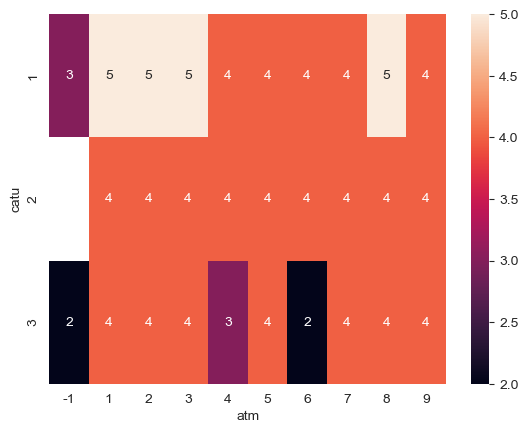

In [179]:
df_heatmap = df_accident_2_selec_Heat_map[['grav', 'atm', 'catu','age' ]]
df_heatmap = df_heatmap.groupby(['catu', 'atm'])['grav'].nunique().reset_index()
df_heatmap = df_heatmap.pivot(index='catu', columns='atm', values='grav')
sns.heatmap(df_heatmap, annot=True)

<AxesSubplot:xlabel='atm', ylabel='dep'>

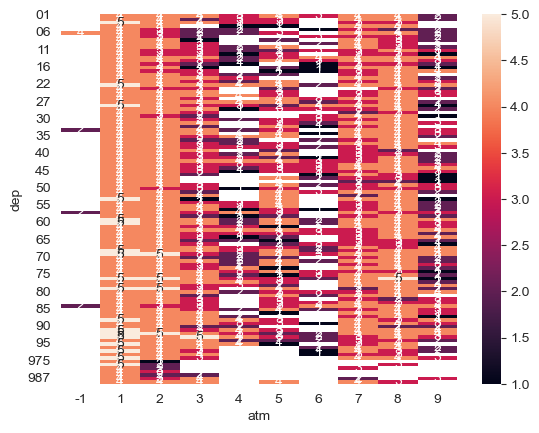

In [176]:
df_heatmap = df_accident_2_selec_Heat_map[['grav', 'atm', 'dep']]
df_heatmap = df_heatmap.groupby(['dep', 'atm'])['grav'].nunique().reset_index()
df_heatmap = df_heatmap.pivot(index='dep', columns='atm', values='grav')
sns.heatmap(df_heatmap, annot=True)

<AxesSubplot:xlabel='atm', ylabel='age'>

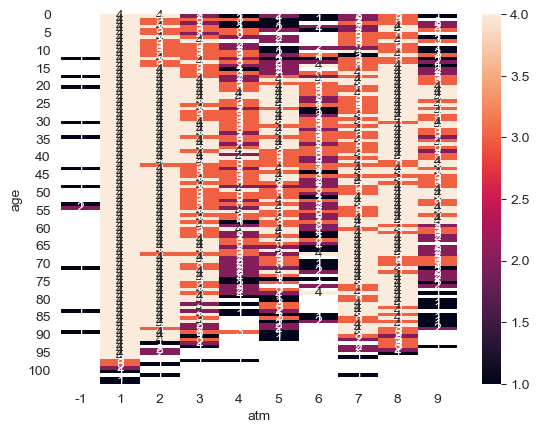

In [180]:
df_heatmap = df_accident_2_selec_Heat_map[['grav', 'atm', 'age']]
df_heatmap = df_heatmap.groupby(['age', 'atm'])['grav'].nunique().reset_index()
df_heatmap = df_heatmap.pivot(index='age', columns='atm', values='grav')
sns.heatmap(df_heatmap, annot=True)